In [1]:
import pandas as pd
import requests
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns

In [39]:
df = pd.read_csv(r'C:\Users\judit.gyorfi\OneDrive - Irdeto B.V\data for thesis\sessionuserid_daily_usage_200.csv')
df = df.drop(columns='Unnamed: 0')

In [40]:
e = df.sessionuserid.value_counts()
len(e)
## 107k customer

107274

In [47]:
df.head()

datevalue  LicenseCount                  sessionuserid
0  2020-12-14            19  CHARTER.8313:8313100040018429
1  2020-08-22            87      NTX.8260:8260130526737575
2  2020-08-22            49              CAR.202:344922501
3  2020-08-22            15              BHN.003:104821903
4  2020-12-14            10              CVG.003:457846502

#### Filtering out one id that had the biggest difference % compared to the average

In [4]:
fil = ['CHARTER.8752:8752200300106696']

In [5]:
x = df[df['sessionuserid'].isin(fil)]
x = x.drop(columns='datevalue')
x = x.drop(columns='sessionuserid')
x

LicenseCount
197378               3
309746               5
517704               9
543595               2
963326               5
...                ...
26075592             4
26140996             2
26199559             2
26261503             1
26417703             3

[301 rows x 1 columns]

In [6]:
df.dtypes

datevalue        object
LicenseCount      int64
sessionuserid    object
dtype: object

In [7]:
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
robust_scaler = RobustScaler()

In [8]:
X_train_minmax = min_max_scaler.fit_transform(x)
X_train_standard = std_scaler.fit_transform(x)
X_train_robust = robust_scaler.fit_transform(x)

In [9]:
X_train_minmax

array([[4.45732115e-04],
       [8.91464230e-04],
       [1.78292846e-03],
       [2.22866057e-04],
       [8.91464230e-04],
       [2.22866057e-04],
       [0.00000000e+00],
       [3.12012480e-03],
       [4.45732115e-04],
       [1.56006240e-03],
       [1.11433029e-03],
       [4.45732115e-04],
       [2.22866057e-04],
       [2.45152663e-03],
       [4.45732115e-04],
       [2.22866057e-04],
       [8.91464230e-04],
       [0.00000000e+00],
       [4.45732115e-04],
       [8.91464230e-04],
       [2.22866057e-04],
       [4.45732115e-04],
       [1.11433029e-03],
       [6.68598172e-04],
       [8.91464230e-04],
       [0.00000000e+00],
       [2.22866057e-04],
       [6.68598172e-04],
       [6.68598172e-04],
       [0.00000000e+00],
       [1.11433029e-03],
       [4.45732115e-04],
       [0.00000000e+00],
       [6.68598172e-04],
       [2.22866057e-04],
       [2.22866057e-04],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [8.91464230e-04],


In [10]:
from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 10

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_robust)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X_train_minmax, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', kmeans.score)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: <bound method KMeans.score of KMeans(n_clusters=2, random_state=0)>
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: <bound method KMeans.score of KMeans(n_clusters=3, random_state=0)>
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: <bound method KMeans.score of KMeans(n_clusters=4, random_state=0)>
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: <bound method KMeans.score of KMeans(n_clusters=5, random_state=0)>
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: <bound method KMeans.sc

----------------------------------------------------------------------------------------------------


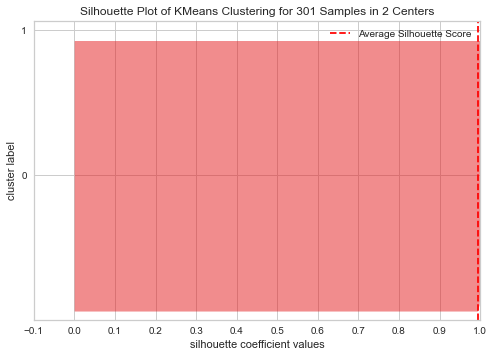

----------------------------------------------------------------------------------------------------


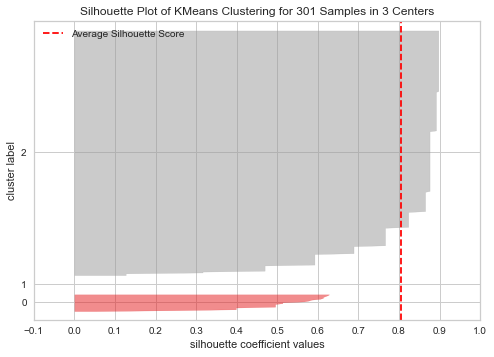

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,3]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(x)

    # show the chart
    visualizer.poof()

#### Testing a clustering on the top 10 of the datasets

##### https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [12]:
top_10 = ['CHARTER.8752:8752200300106696',
 'CAR.202:268245915',
 'CAK.001:221036902',
 'NYC.8150:8150120012457427',
 'CHARTER.8245:8245116001010430',
 'BHN.003:312092605',
 'NTX.8260:8260170120015507',
 'CHARTER.8245:8245100407540968',
 'BHN.003:481494702',
 'BHN.003:194192009']

In [13]:
df = df.copy()

In [14]:
df = df[df['sessionuserid'].isin(top_10)].sort_values('sessionuserid', ascending=True)
df = df.drop(columns='datevalue')

In [36]:
minmaxes = []
X_train_minmax_list = []
results_dict = {}

for i in top_10:
    x = df[df['sessionuserid'].isin([i])]
    x = x.drop(columns='sessionuserid')
    X_train_minmax = min_max_scaler.fit_transform(x)
    #print(type(X_train_minmax))
    #X_train_minmax_list.append(X_train_minmax)
    
        

    # define how many clusters we want to test up to.
    num_of_clusters = 5

    # run through each instance of K
    for k in range(2, num_of_clusters):

        print("-"*100)

        # define the next dictionary to hold all the results of this run.
        results_dict[k] = {}

        # create an instance of the model, and fit the training data to it.
        kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_minmax)

        # define the silhouette score
        sil_score = metrics.silhouette_score(X_train_minmax, kmeans.labels_, metric='euclidean')

        # store the different metrics
        results_dict[k]['silhouette_score'] = sil_score
        results_dict[k]['inertia'] = kmeans.inertia_
        results_dict[k]['score'] = kmeans.score
        results_dict[k]['model'] = kmeans

        # print the results    
        print("Number of Clusters: {}".format(k))
        print('Silhouette Score:', sil_score)
        
    
#X_train_standard = std_scaler.fit_transform(x)
#X_train_robust = robust_scaler.fit_transform(x)

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.9957196022754831
-----------next one----------------------
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.8042947518166621
-----------next one----------------------
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.6804722580655538
-----------next one----------------------
----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.995011652525842
-----------next one----------------------
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.752766581744343
-----------next one---------------

## Implementing K-means clustering and isolation forest methods
#### https://github.com/bauyrjanj/Anomaly_Detection/tree/master/models

In [2]:
def calc_percent_NAs(df):
    nans = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]

In [35]:
df = pd.read_csv(r'C:\Users\judit.gyorfi\OneDrive - Irdeto B.V\data for thesis\sessionuserid_daily_usage_300.csv')
df = df.drop(columns='Unnamed: 0')

In [36]:
df.describe().T

count       mean        std  min  25%   50%   75%     max
LicenseCount  1411638.0  17.321507  33.736812  1.0  5.0  10.0  20.0  7213.0

##### Creating a random list of 50 users

In [37]:
users = df['sessionuserid'].sample(n=50, replace=False)
users = users.to_list()
new = df[df['sessionuserid'].isin(users)]

In [38]:
users

['CTX.8260:8260160240040212',
 'CHARTER.8781:8781100490175045',
 'CVG.003:468963201',
 'NYC.8150:8150120020684954',
 'CHARTER.8345:8345780016805545',
 'LXM.8448:8448200013430060',
 'MKE.004:054930302',
 'MKC.001:033726703',
 'NTX.8260:8260130280773519',
 'BHN.003:514411902',
 'CAR.202:421920902',
 'CHARTER.8245:8245124770044531',
 'NER.202:180156003',
 'CHARTER.8351:8351200111498568',
 'CAR.202:540810703',
 'CTX.8260:8260161580332151',
 'LBT.8150:8150310020001214',
 'CHARTER.8353:8353300080164593',
 'LNK.8347:8347100014893781',
 'NER.202:732455806',
 'HWI.8109:8109101003303392',
 'BHN.003:176727411',
 'CMH.002:335176702',
 'NER.202:835908207',
 'CAK.001:274282101',
 'NER.202:772221603',
 'BHN.003:109608405',
 'CVG.003:810803201',
 'MKE.004:027931502',
 'CAK.001:297736902',
 'LXM.8448:8448400262935815',
 'STX.8260:8260180491554554',
 'CAR.202:462991101',
 'CAR.202:021288505',
 'CHARTER.8245:8245114280213460',
 'NER.202:067274404',
 'NER.202:658737601',
 'NER.202:824655106',
 'CHARTER.82

In [39]:
new

datevalue  LicenseCount                  sessionuserid
37       2020-07-28            16              MKE.004:027931502
41       2020-06-12            46              CAK.001:297736902
89       2020-06-12            13      CTX.8260:8260160240040212
152      2020-07-28            11              NER.202:822156101
281      2020-07-28            29              CMH.002:335176702
...             ...           ...                            ...
1411191  2020-07-07             3              NER.202:699681902
1411233  2020-05-17             1  CHARTER.8245:8245124770044531
1411268  2020-05-16             4              NER.202:835908207
1411353  2020-05-03             1  CHARTER.8245:8245124770044531
1411561  2020-09-20             3              CAK.001:283173304

[15166 rows x 3 columns]

In [40]:
import warnings
warnings.filterwarnings("ignore")
new['date'] = pd.to_datetime(new['datevalue'])
del new['datevalue']

In [41]:
new

LicenseCount                  sessionuserid       date
37                 16              MKE.004:027931502 2020-07-28
41                 46              CAK.001:297736902 2020-06-12
89                 13      CTX.8260:8260160240040212 2020-06-12
152                11              NER.202:822156101 2020-07-28
281                29              CMH.002:335176702 2020-07-28
...               ...                            ...        ...
1411191             3              NER.202:699681902 2020-07-07
1411233             1  CHARTER.8245:8245124770044531 2020-05-17
1411268             4              NER.202:835908207 2020-05-16
1411353             1  CHARTER.8245:8245124770044531 2020-05-03
1411561             3              CAK.001:283173304 2020-09-20

[15166 rows x 3 columns]

In [42]:
res = new.pivot(index='date', columns='sessionuserid', values='LicenseCount')

In [43]:
res

sessionuserid  BHN.003:109608405  BHN.003:176727411  BHN.003:495850702  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   4.0                NaN                NaN   
2020-03-19                   NaN                NaN               10.0   
2020-03-20                   1.0                6.0               31.0   
2020-03-21                   6.0                7.0               54.0   
...                          ...                ...                ...   
2021-01-23                   2.0                3.0               38.0   
2021-01-24                  10.0                2.0               12.0   
2021-01-25                   4.0                2.0               30.0   
2021-01-26                   4.0                5.0               17.0   
2021-01-27                   3.0                3.0                7.0   

sessionuserid  BHN.003:514411902  CAK.001:274282101  CAK.001:283173304  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                2.0                1.0   
2020-03-19                   NaN               41.0                3.0   
2020-03-20                  30.0              173.0                2.0   
2020-03-21                   NaN              119.0                4.0   
...                          ...                ...                ...   
2021-01-23                   7.0                9.0                1.0   
2021-01-24                  21.0               17.0                3.0   
2021-01-25                   9.0                3.0                6.0   
2021-01-26                  11.0                1.0                2.0   
2021-01-27                   6.0               16.0                2.0   

sessionuserid  CAK.001:297736902  CAR.202:021288505  CAR.202:273335206  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                NaN               15.0   
2020-03-19                   3.0                NaN                3.0   
2020-03-20                  44.0               19.0               49.0   
2020-03-21                  36.0               22.0               42.0   
...                          ...                ...                ...   
2021-01-23                  47.0               11.0               48.0   
2021-01-24                  51.0               14.0               34.0   
2021-01-25                  19.0               11.0               42.0   
2021-01-26                  17.0               14.0               43.0   
2021-01-27                  37.0               10.0               44.0   

sessionuserid  CAR.202:315685808  ...  NER.202:699681902  NER.202:732455806  \
date                              ...                                         
2020-03-17                   NaN  ...                NaN                NaN   
2020-03-18                   NaN  ...                NaN                2.0   
2020-03-19                   NaN  ...                4.0                4.0   
2020-03-20                   NaN  ...                8.0               14.0   
2020-03-21                  10.0  ...                5.0                6.0   
...                          ...  ...                ...                ...   
2021-01-23                   1.0  ...                2.0                6.0   
2021-01-24                   2.0  ...                7.0                7.0   
2021-01-25                   2.0  ...               10.0                6.0   
2021-01-26                   NaN  ...                2.0                2.0   
2021-01-27                   3.0  ...                5.0                3.0   

sessionuserid  NER.202:772221603  NER.202:822156101  NER.202:824655106  \
date     

##### Between 3-7% of the data is missing in the columns

In [44]:
calc_percent_NAs(res)

percent
sessionuserid                          
MKE.004:054930302              0.050473
CVG.003:810803201              0.047319
BHN.003:514411902              0.047319
MKE.004:027931502              0.044164
HWI.8109:8109101003303392      0.044164
CAK.001:283173304              0.044164
LBT.8150:8150310020001214      0.044164
CVG.003:468963201              0.044164
CHARTER.8345:8345780016805545  0.041009
LXM.8448:8448200016636762      0.041009
CAR.202:315685808              0.041009
LXM.8448:8448400262935815      0.041009
NER.202:732455806              0.037855
CHARTER.8351:8351200110280272  0.037855
BHN.003:176727411              0.034700
CHARTER.8245:8245114280213460  0.031546
NYC.8150:8150100071060940      0.031546
CHARTER.8245:8245111160024140  0.028391
CHARTER.8353:8353300080164593  0.028391
NER.202:067274404              0.028391
CHARTER.8245:8245124770044531  0.025237
CAR.202:462991101              0.025237
CTX.8260:8260161580332151      0.025237
NER.202:699681902              0.022082
NER.202:772221603              0.022082
BHN.003:109608405              0.022082
CAK.001:274282101              0.022082
NTX.8260:8260130280773519      0.018927
CHARTER.8351:8351200111498568  0.015773
CTX.8260:8260160240040212      0.015773
CAR.202:021288505              0.015773
NYC.8150:8150120020684954      0.012618
BHN.003:495850702              0.012618
NER.202:658737601              0.012618
CHARTER.8781:8781100490175045  0.009464
NER.202:835908207              0.009464
CAR.202:540810703              0.009464
NER.202:824655106              0.009464
NER.202:822156101              0.009464
CTX.8260:8260161570506509      0.006309
STX.8260:8260180491554554      0.006309
CAK.001:297736902              0.006309
MKC.001:033726703              0.006309
LXM.8448:8448200013430060      0.006309
LNK.8347:8347100014893781      0.006309
CMH.002:335176702              0.006309
CAR.202:273335206              0.003155
CAR.202:421920902              0.003155
NER.202:180156003              0.003155

In [84]:
df = res.copy()
df

sessionuserid  BHN.003:109608405  BHN.003:176727411  BHN.003:495850702  \
date                                                                     
2020-03-17              6.409677           5.104575          18.584665   
2020-03-18              4.000000           5.104575          18.584665   
2020-03-19              6.409677           5.104575          10.000000   
2020-03-20              1.000000           6.000000          31.000000   
2020-03-21              6.000000           7.000000          54.000000   
...                          ...                ...                ...   
2021-01-23              2.000000           3.000000          38.000000   
2021-01-24             10.000000           2.000000          12.000000   
2021-01-25              4.000000           2.000000          30.000000   
2021-01-26              4.000000           5.000000          17.000000   
2021-01-27              3.000000           3.000000           7.000000   

sessionuserid  BHN.003:514411902  CAK.001:274282101  CAK.001:283173304  \
date                                                                     
2020-03-17             29.109272          33.090323           3.537954   
2020-03-18             29.109272           2.000000           1.000000   
2020-03-19             29.109272          41.000000           3.000000   
2020-03-20             30.000000         173.000000           2.000000   
2020-03-21             29.109272         119.000000           4.000000   
...                          ...                ...                ...   
2021-01-23              7.000000           9.000000           1.000000   
2021-01-24             21.000000          17.000000           3.000000   
2021-01-25              9.000000           3.000000           6.000000   
2021-01-26             11.000000           1.000000           2.000000   
2021-01-27              6.000000          16.000000           2.000000   

sessionuserid  CAK.001:297736902  CAR.202:021288505  CAR.202:273335206  \
date                                                                     
2020-03-17             35.384127          15.759615          44.556962   
2020-03-18             35.384127          15.759615          15.000000   
2020-03-19              3.000000          15.759615           3.000000   
2020-03-20             44.000000          19.000000          49.000000   
2020-03-21             36.000000          22.000000          42.000000   
...                          ...                ...                ...   
2021-01-23             47.000000          11.000000          48.000000   
2021-01-24             51.000000          14.000000          34.000000   
2021-01-25             19.000000          11.000000          42.000000   
2021-01-26             17.000000          14.000000          43.000000   
2021-01-27             37.000000          10.000000          44.000000   

sessionuserid  CAR.202:315685808  ...  NER.202:824655106  NER.202:835908207  \
date                              ...                                         
2020-03-17              4.726974  ...          20.273885          13.910828   
2020-03-18              4.726974  ...          20.273885          13.910828   
2020-03-19              4.726974  ...          20.273885          13.910828   
2020-03-20              4.726974  ...          23.000000           3.000000   
2020-03-21             10.000000  ...           7.000000          26.000000   
...                          ...  ...                ...                ...   
2021-01-23              1.000000  ...          39.000000          14.000000   
2021-01-24              2.000000  ...          48.000000          12.000000   
2021-01-25              2.000000  ...          44.000000          12.000000   
2021-01-26              4.726974  ...          44.000000          14.000000   
2021-01-27              3.000000  ...          42.000000          12.000000   

sessionuserid  NTX.8260:8260130280773519  NYC.8150:8150100071060940  \
date        

In [22]:
for i in users:
    df[i].fillna((df[i].mean()), inplace=True)

In [85]:
df.dtypes

sessionuserid
BHN.003:109608405                float64
BHN.003:176727411                float64
BHN.003:495850702                float64
BHN.003:514411902                float64
CAK.001:274282101                float64
CAK.001:283173304                float64
CAK.001:297736902                float64
CAR.202:021288505                float64
CAR.202:273335206                float64
CAR.202:315685808                float64
CAR.202:421920902                float64
CAR.202:462991101                float64
CAR.202:540810703                float64
CHARTER.8245:8245111160024140    float64
CHARTER.8245:8245114280213460    float64
CHARTER.8245:8245124770044531    float64
CHARTER.8345:8345780016805545    float64
CHARTER.8351:8351200110280272    float64
CHARTER.8351:8351200111498568    float64
CHARTER.8353:8353300080164593    float64
CHARTER.8781:8781100490175045    float64
CMH.002:335176702                float64
CTX.8260:8260160240040212        float64
CTX.8260:8260161570506509        float64
CT

In [24]:
calc_percent_NAs(df)

Empty DataFrame
Columns: [percent]
Index: []

In [25]:
df.to_csv('step2_output_50userid.csv')

### Step 3 to 5

In [26]:
res = pd.read_csv('step2_output_50userid.csv')

In [27]:
res['date'] = pd.to_datetime(res['date'])

In [28]:
res.set_index('date', inplace=True)

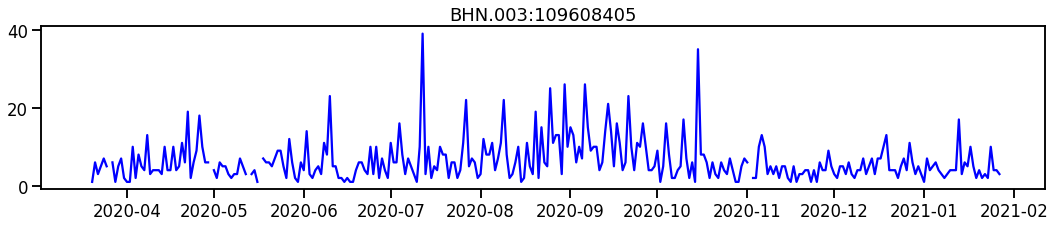

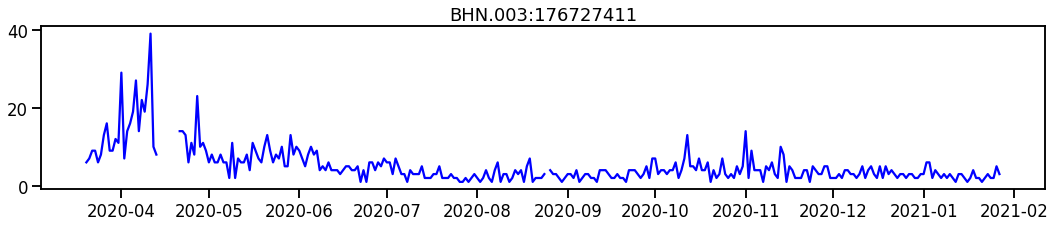

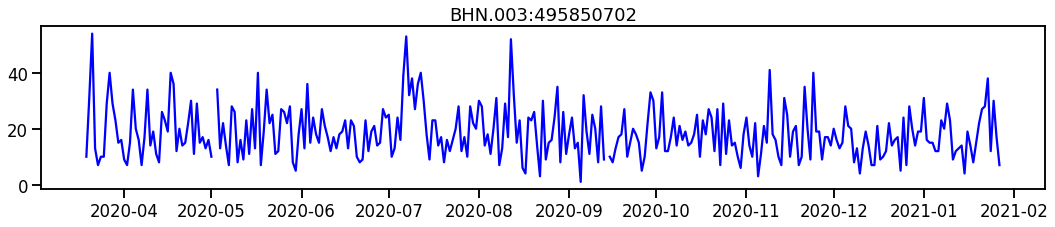

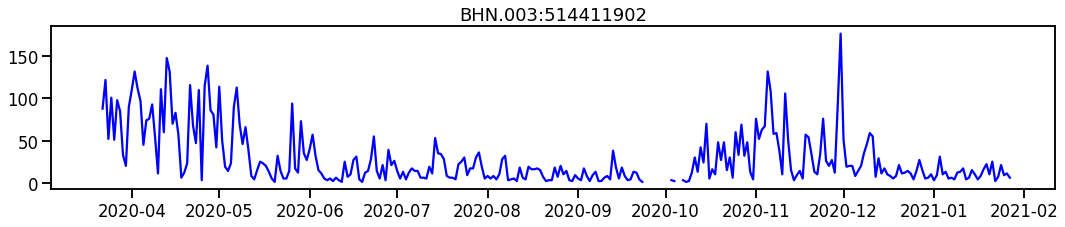

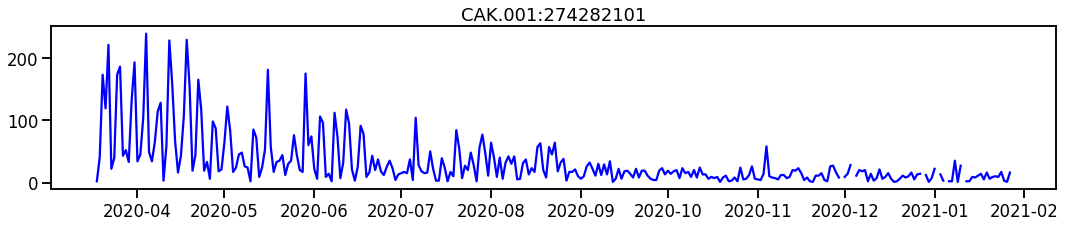

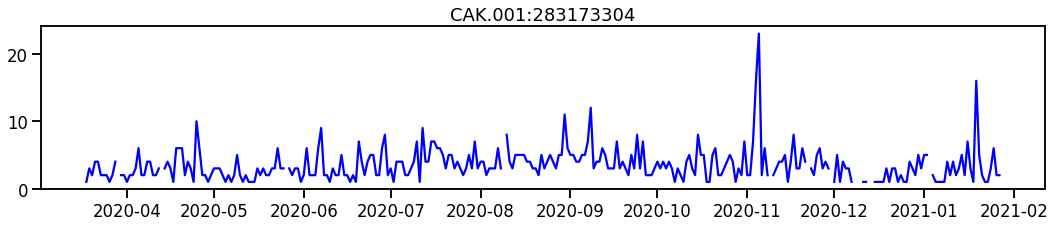

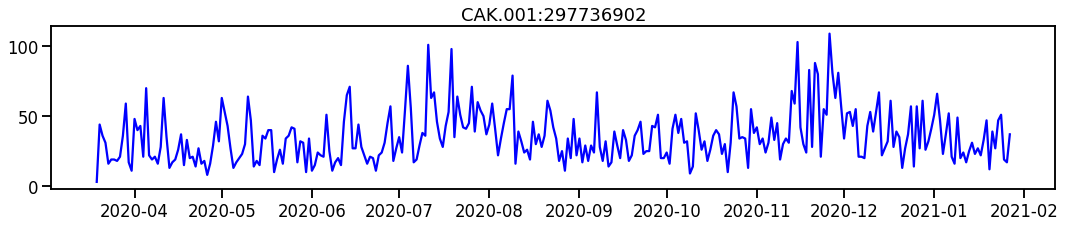

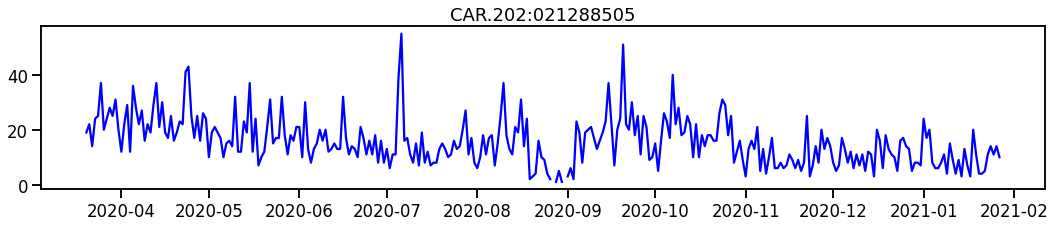

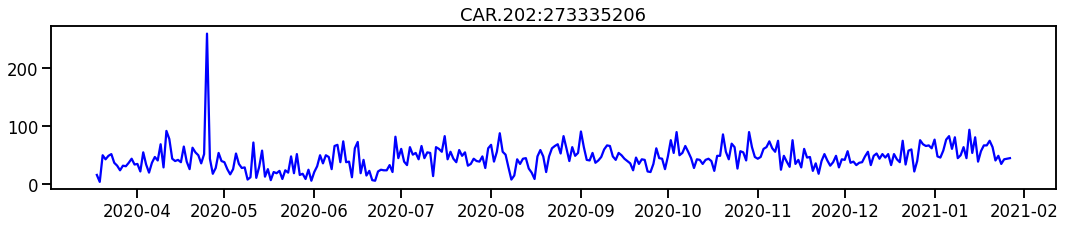

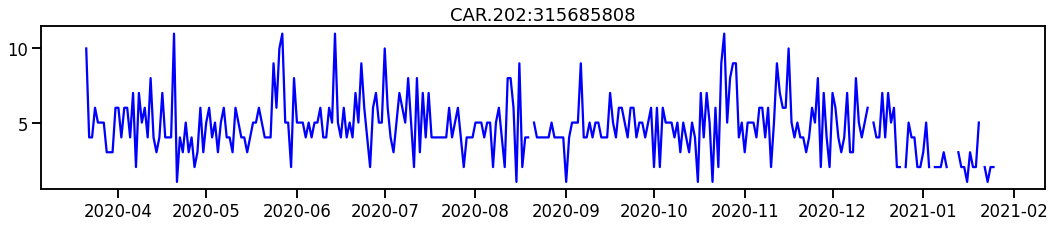

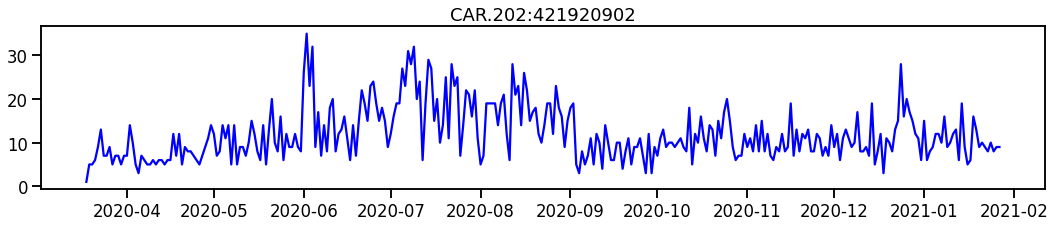

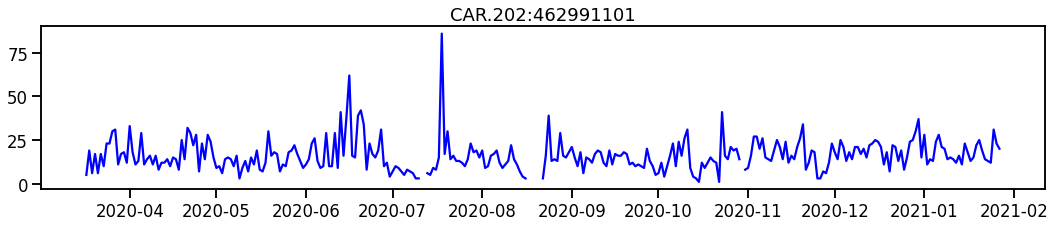

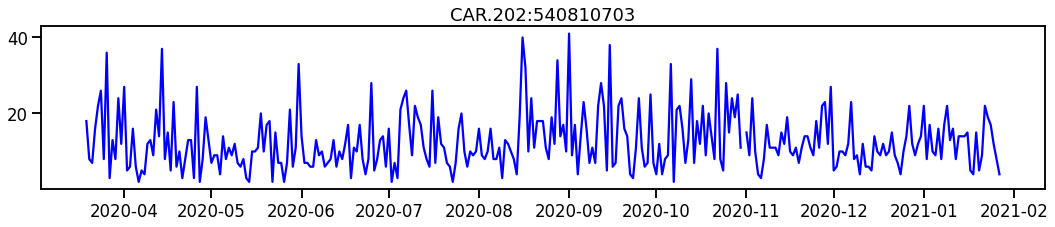

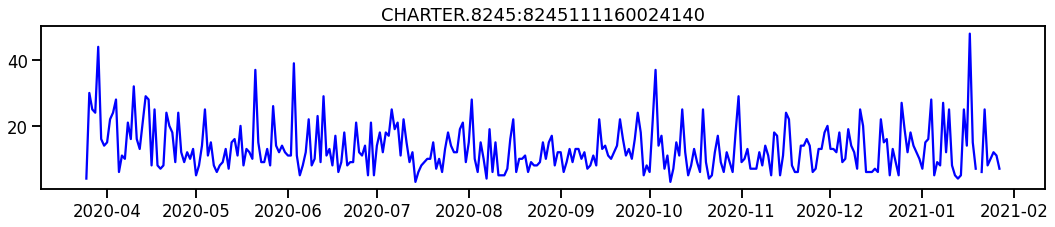

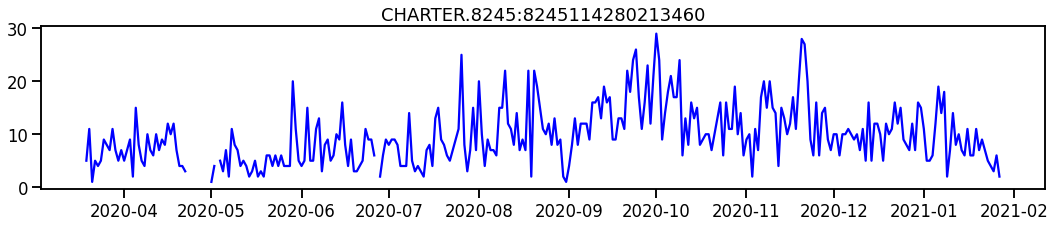

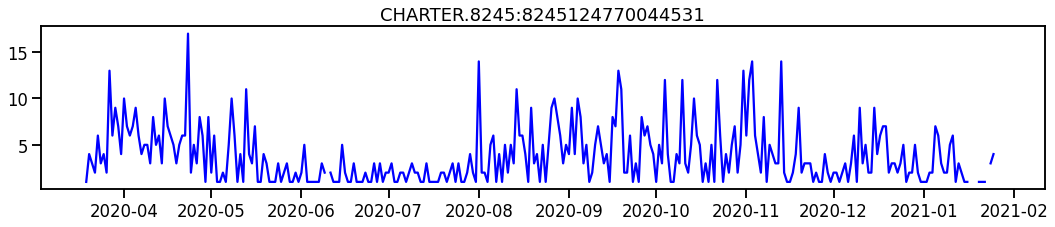

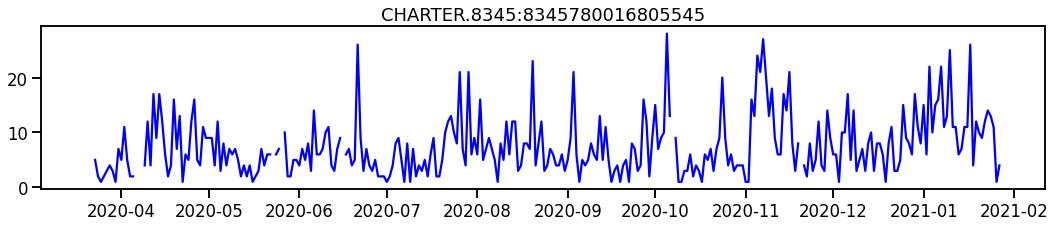

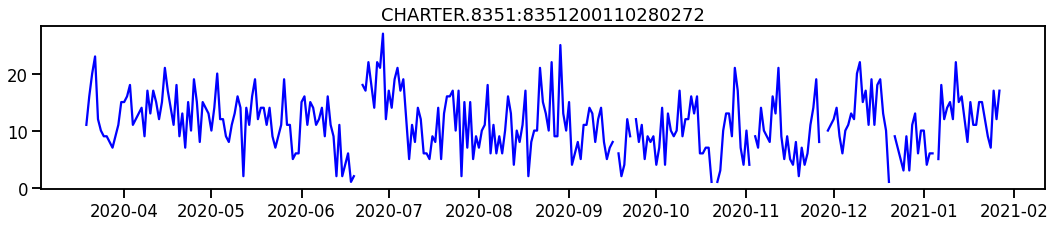

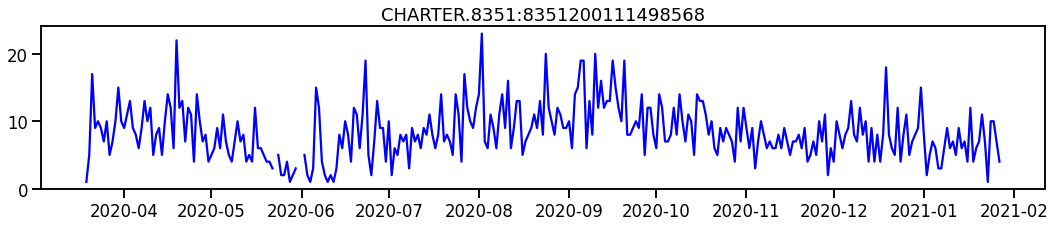

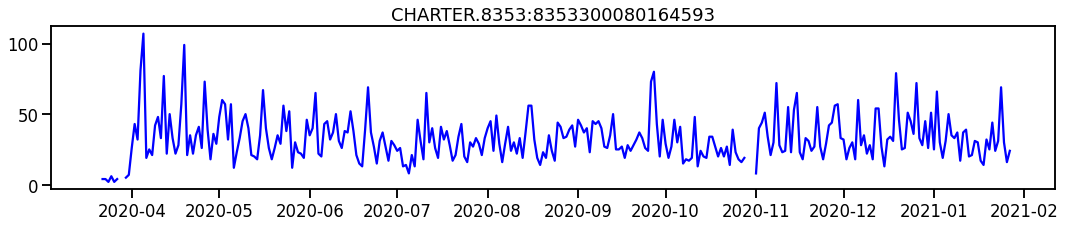

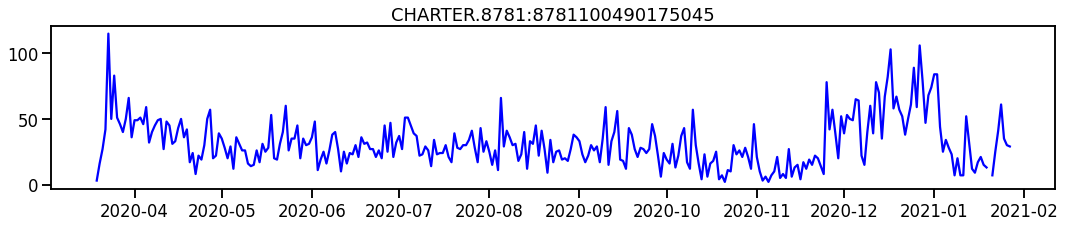

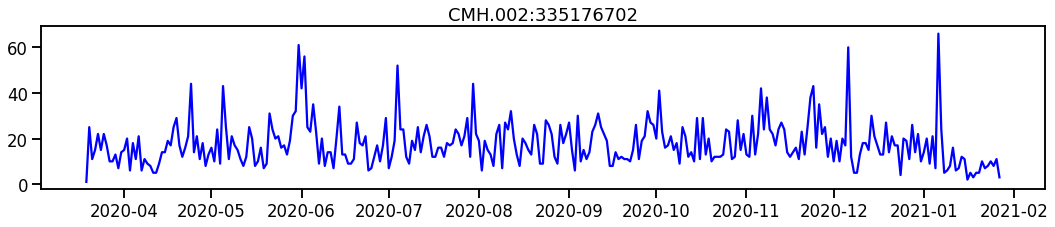

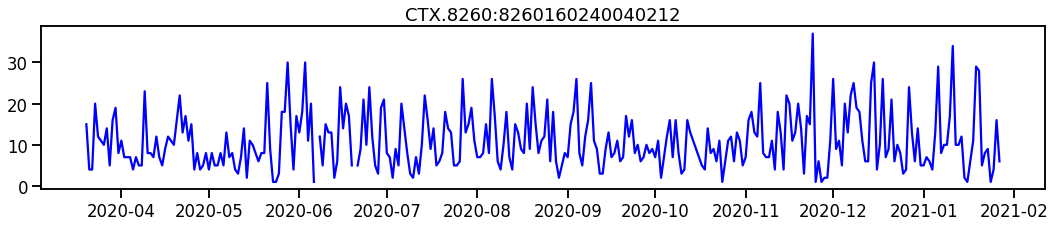

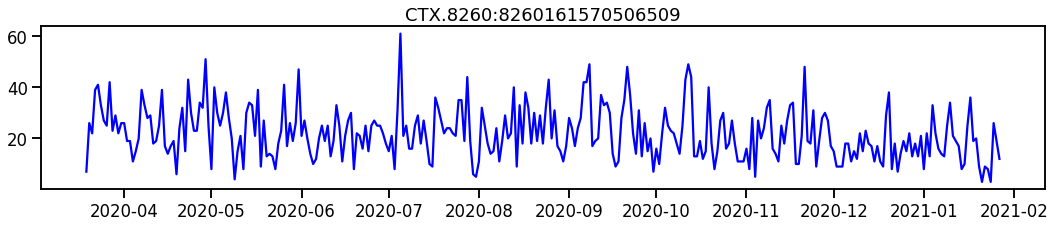

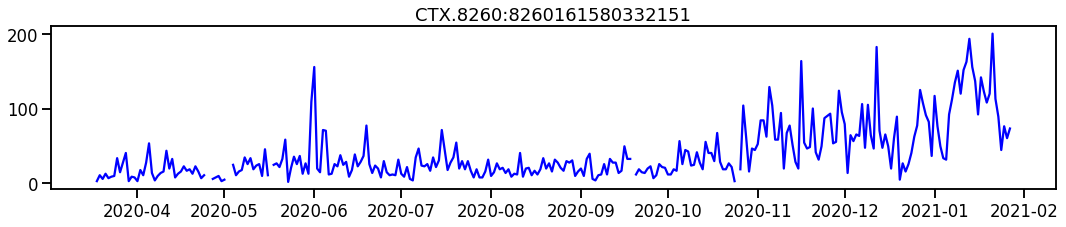

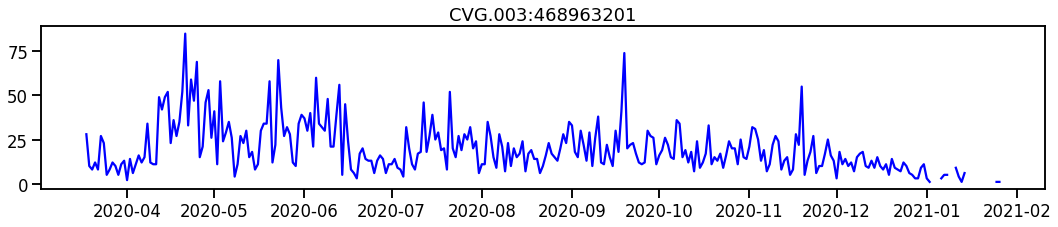

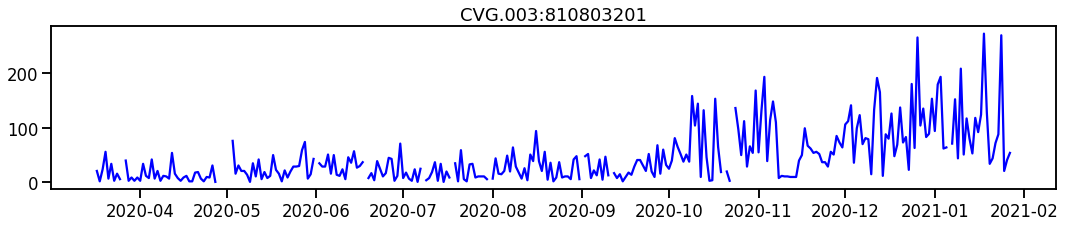

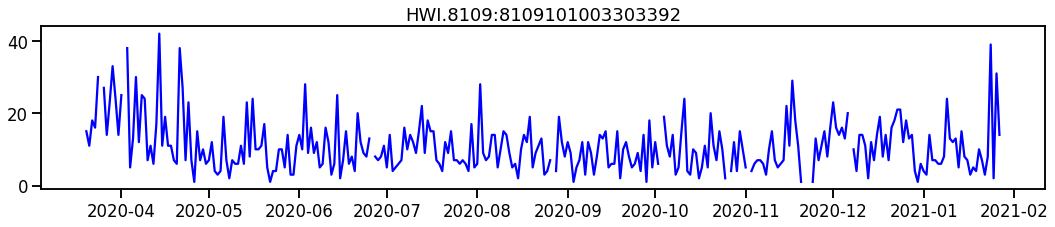

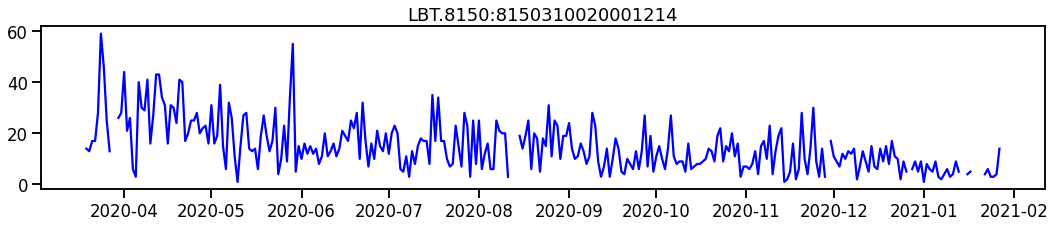

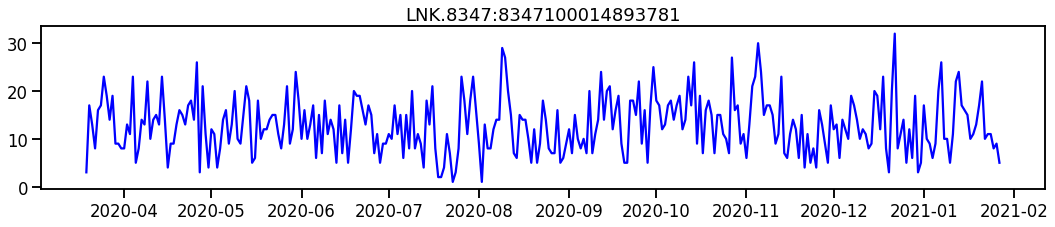

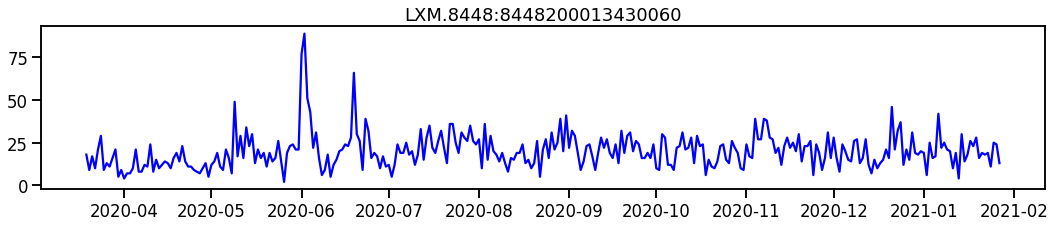

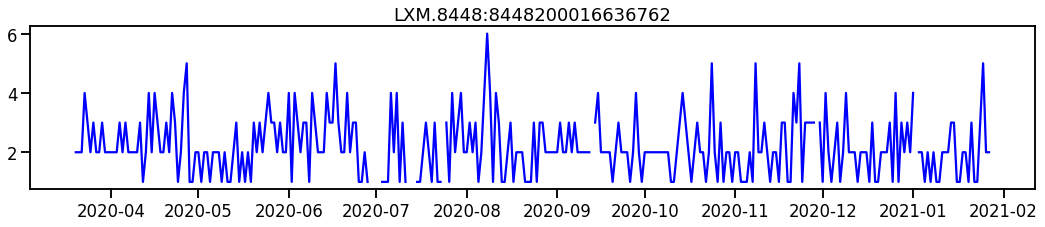

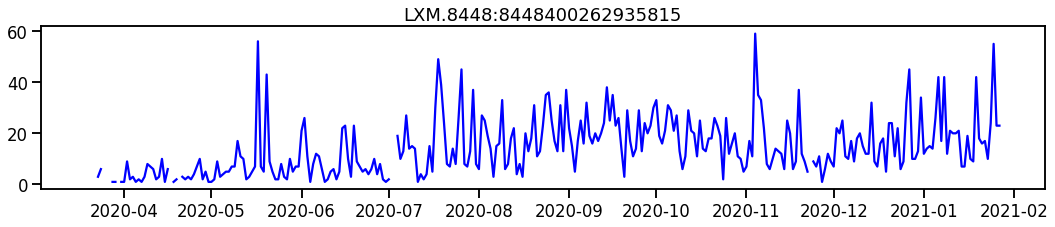

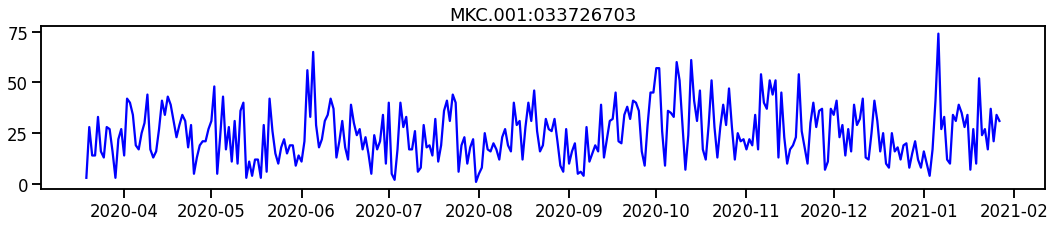

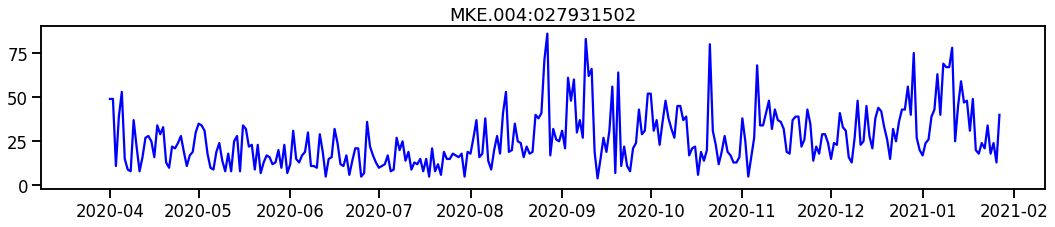

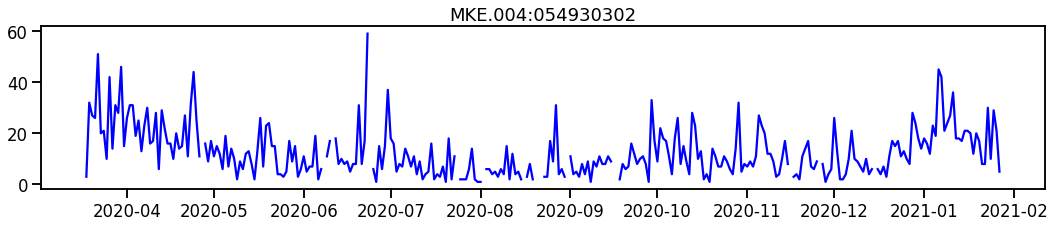

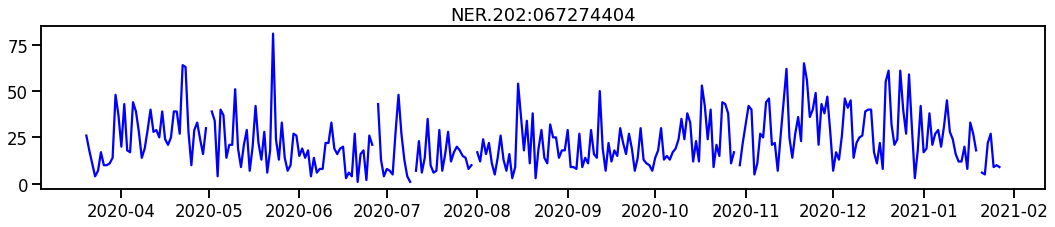

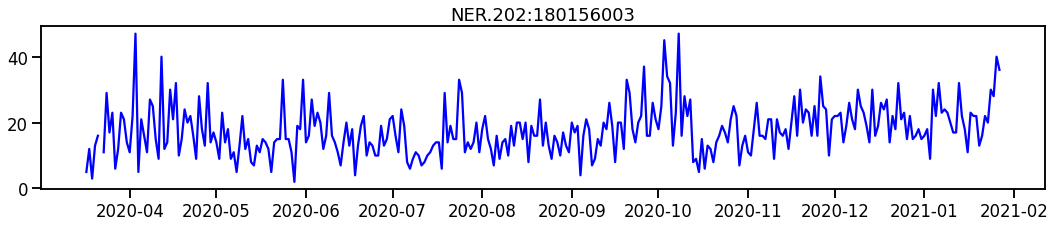

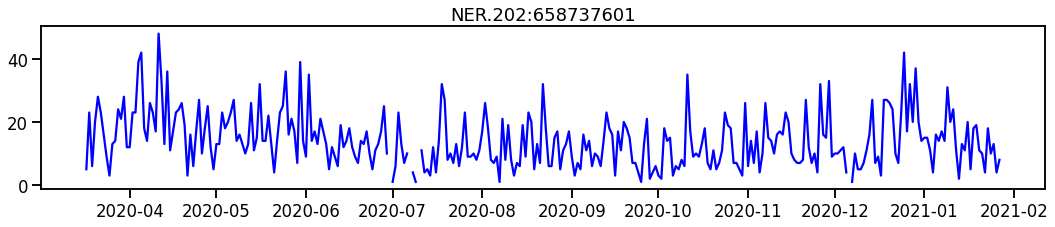

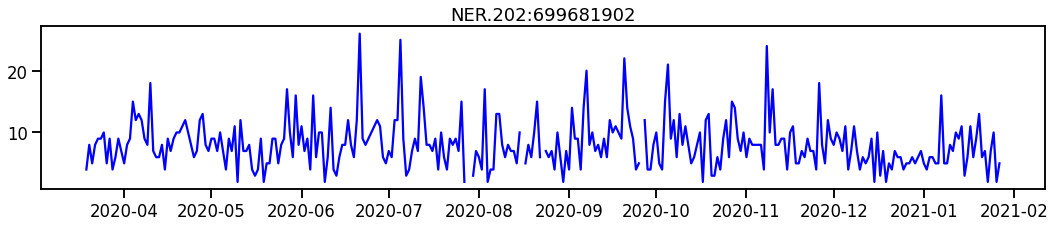

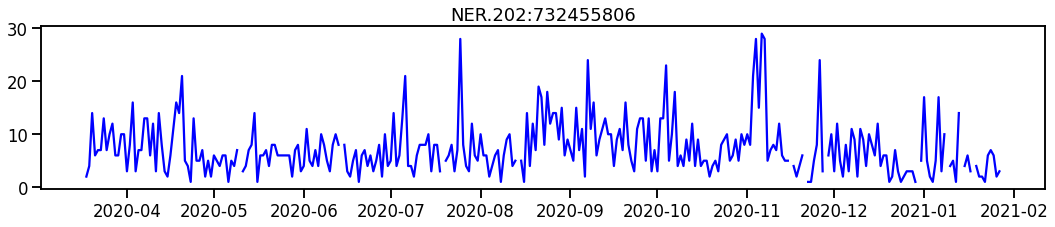

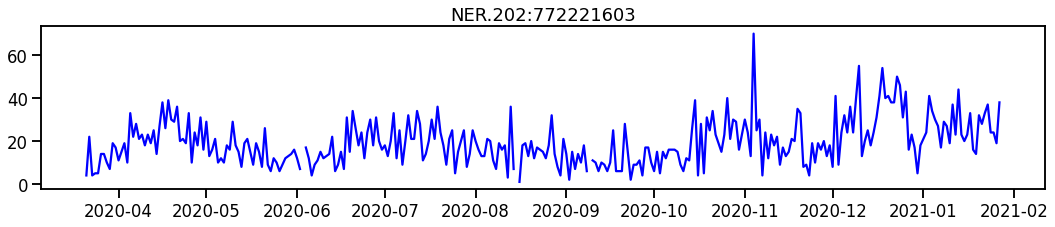

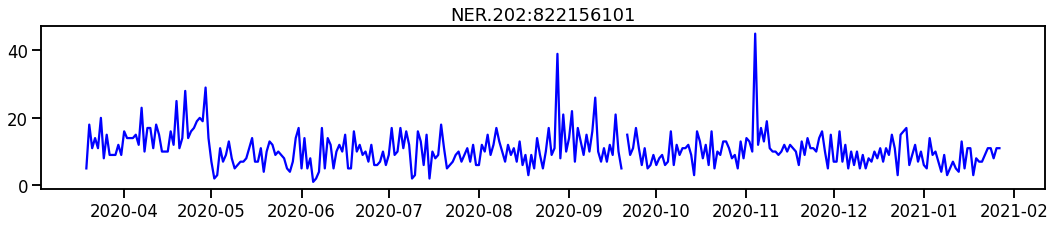

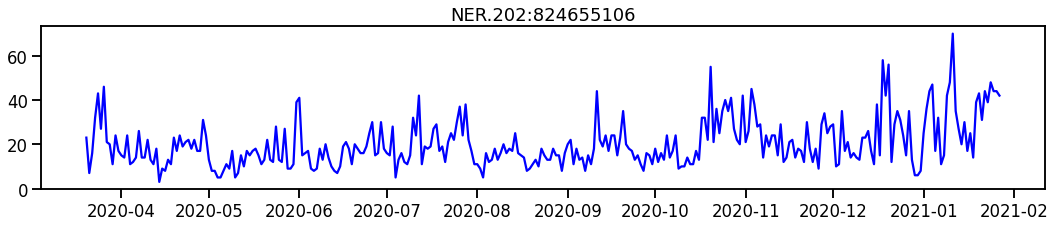

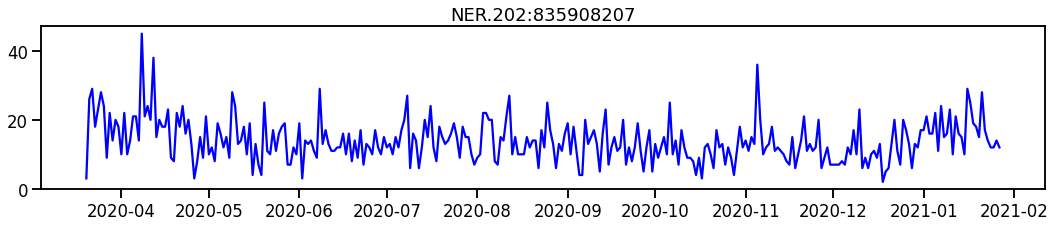

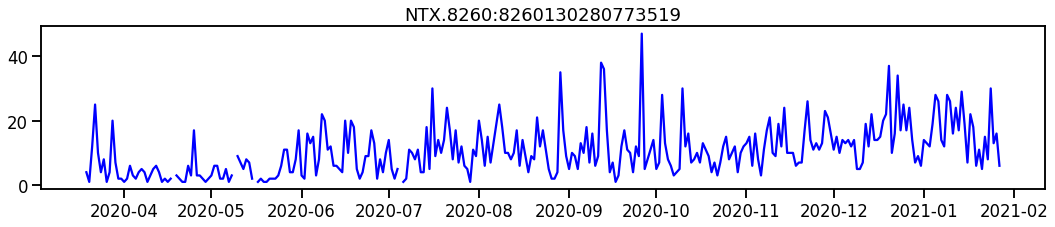

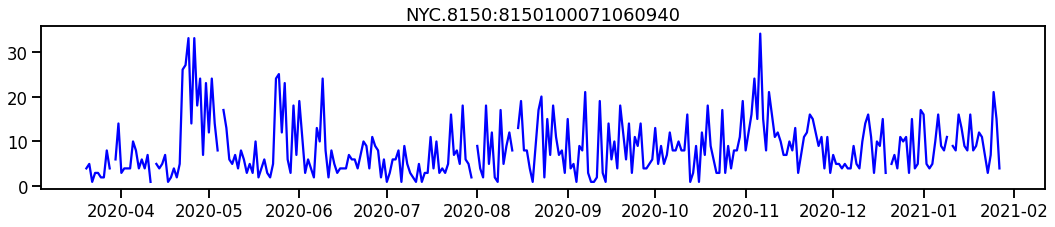

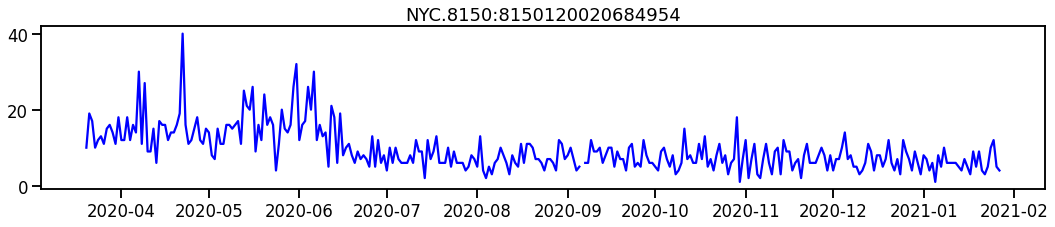

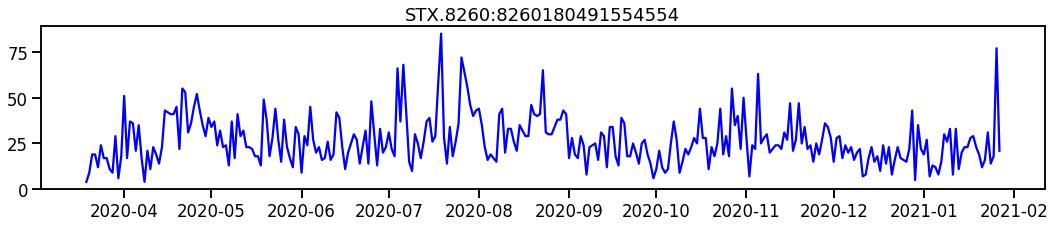

In [45]:
import warnings

names=res.columns
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(res[name], color='blue')
    _ = plt.title(name)
    plt.show()

##### Resample the entire dataset by daily average

In [46]:
rollmean = res.resample(rule='D').mean()
rollstd = res.resample(rule='D').std()

In [47]:
rollstd

sessionuserid  BHN.003:109608405  BHN.003:176727411  BHN.003:495850702  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                NaN                NaN   
2020-03-19                   NaN                NaN                NaN   
2020-03-20                   NaN                NaN                NaN   
2020-03-21                   NaN                NaN                NaN   
...                          ...                ...                ...   
2021-01-23                   NaN                NaN                NaN   
2021-01-24                   NaN                NaN                NaN   
2021-01-25                   NaN                NaN                NaN   
2021-01-26                   NaN                NaN                NaN   
2021-01-27                   NaN                NaN                NaN   

sessionuserid  BHN.003:514411902  CAK.001:274282101  CAK.001:283173304  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                NaN                NaN   
2020-03-19                   NaN                NaN                NaN   
2020-03-20                   NaN                NaN                NaN   
2020-03-21                   NaN                NaN                NaN   
...                          ...                ...                ...   
2021-01-23                   NaN                NaN                NaN   
2021-01-24                   NaN                NaN                NaN   
2021-01-25                   NaN                NaN                NaN   
2021-01-26                   NaN                NaN                NaN   
2021-01-27                   NaN                NaN                NaN   

sessionuserid  CAK.001:297736902  CAR.202:021288505  CAR.202:273335206  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                NaN                NaN   
2020-03-19                   NaN                NaN                NaN   
2020-03-20                   NaN                NaN                NaN   
2020-03-21                   NaN                NaN                NaN   
...                          ...                ...                ...   
2021-01-23                   NaN                NaN                NaN   
2021-01-24                   NaN                NaN                NaN   
2021-01-25                   NaN                NaN                NaN   
2021-01-26                   NaN                NaN                NaN   
2021-01-27                   NaN                NaN                NaN   

sessionuserid  CAR.202:315685808  ...  NER.202:699681902  NER.202:732455806  \
date                              ...                                         
2020-03-17                   NaN  ...                NaN                NaN   
2020-03-18                   NaN  ...                NaN                NaN   
2020-03-19                   NaN  ...                NaN                NaN   
2020-03-20                   NaN  ...                NaN                NaN   
2020-03-21                   NaN  ...                NaN                NaN   
...                          ...  ...                ...                ...   
2021-01-23                   NaN  ...                NaN                NaN   
2021-01-24                   NaN  ...                NaN                NaN   
2021-01-25                   NaN  ...                NaN                NaN   
2021-01-26                   NaN  ...                NaN                NaN   
2021-01-27                   NaN  ...                NaN                NaN   

sessionuserid  NER.202:772221603  NER.202:822156101  NER.202:824655106  \
date     

In [48]:
rollmean

sessionuserid  BHN.003:109608405  BHN.003:176727411  BHN.003:495850702  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   4.0                NaN                NaN   
2020-03-19                   NaN                NaN               10.0   
2020-03-20                   1.0                6.0               31.0   
2020-03-21                   6.0                7.0               54.0   
...                          ...                ...                ...   
2021-01-23                   2.0                3.0               38.0   
2021-01-24                  10.0                2.0               12.0   
2021-01-25                   4.0                2.0               30.0   
2021-01-26                   4.0                5.0               17.0   
2021-01-27                   3.0                3.0                7.0   

sessionuserid  BHN.003:514411902  CAK.001:274282101  CAK.001:283173304  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                2.0                1.0   
2020-03-19                   NaN               41.0                3.0   
2020-03-20                  30.0              173.0                2.0   
2020-03-21                   NaN              119.0                4.0   
...                          ...                ...                ...   
2021-01-23                   7.0                9.0                1.0   
2021-01-24                  21.0               17.0                3.0   
2021-01-25                   9.0                3.0                6.0   
2021-01-26                  11.0                1.0                2.0   
2021-01-27                   6.0               16.0                2.0   

sessionuserid  CAK.001:297736902  CAR.202:021288505  CAR.202:273335206  \
date                                                                     
2020-03-17                   NaN                NaN                NaN   
2020-03-18                   NaN                NaN               15.0   
2020-03-19                   3.0                NaN                3.0   
2020-03-20                  44.0               19.0               49.0   
2020-03-21                  36.0               22.0               42.0   
...                          ...                ...                ...   
2021-01-23                  47.0               11.0               48.0   
2021-01-24                  51.0               14.0               34.0   
2021-01-25                  19.0               11.0               42.0   
2021-01-26                  17.0               14.0               43.0   
2021-01-27                  37.0               10.0               44.0   

sessionuserid  CAR.202:315685808  ...  NER.202:699681902  NER.202:732455806  \
date                              ...                                         
2020-03-17                   NaN  ...                NaN                NaN   
2020-03-18                   NaN  ...                NaN                2.0   
2020-03-19                   NaN  ...                4.0                4.0   
2020-03-20                   NaN  ...                8.0               14.0   
2020-03-21                  10.0  ...                5.0                6.0   
...                          ...  ...                ...                ...   
2021-01-23                   1.0  ...                2.0                6.0   
2021-01-24                   2.0  ...                7.0                7.0   
2021-01-25                   2.0  ...               10.0                6.0   
2021-01-26                   NaN  ...                2.0                2.0   
2021-01-27                   3.0  ...                5.0                3.0   

sessionuserid  NER.202:772221603  NER.202:822156101  NER.202:824655106  \
date     

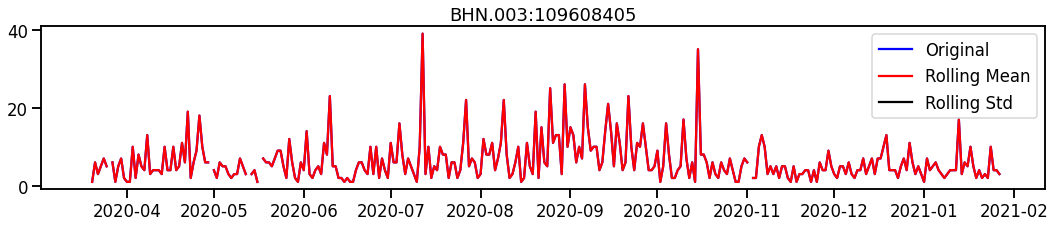

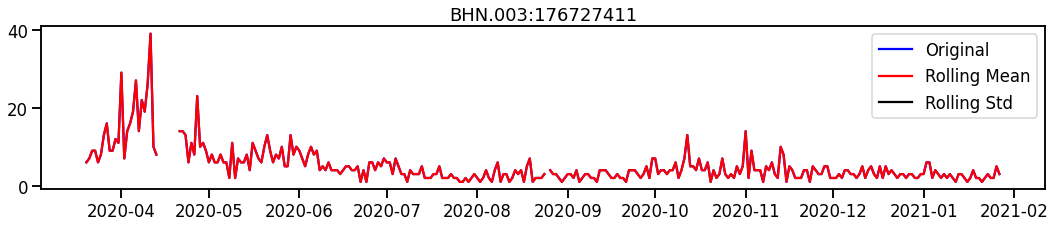

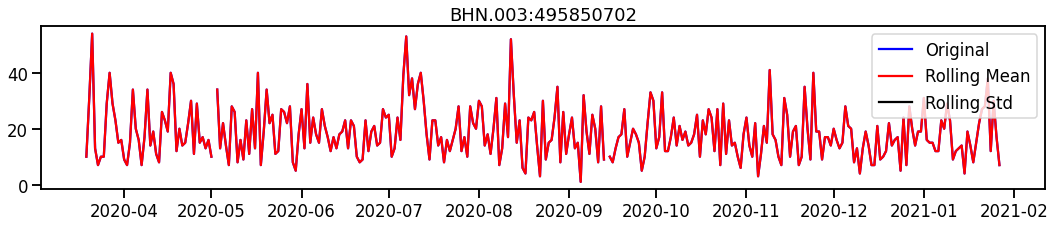

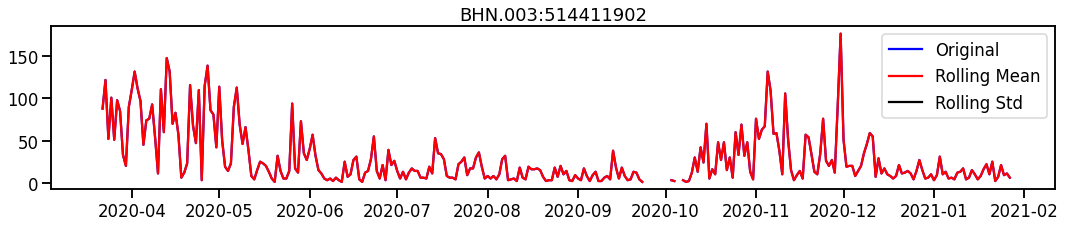

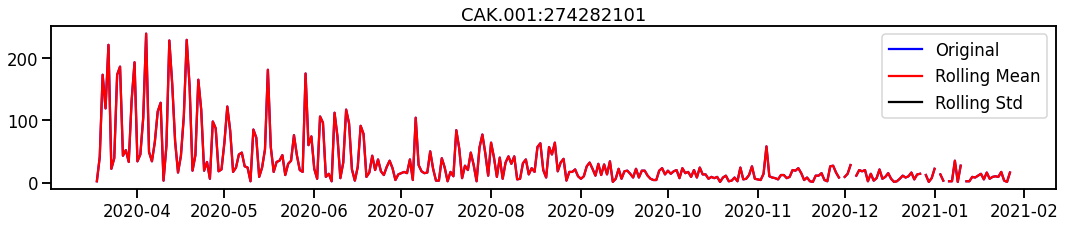

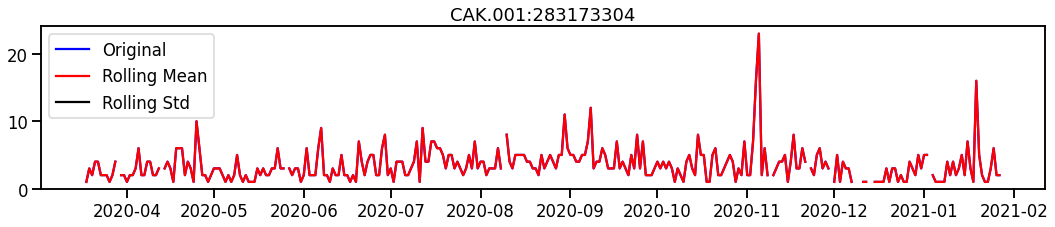

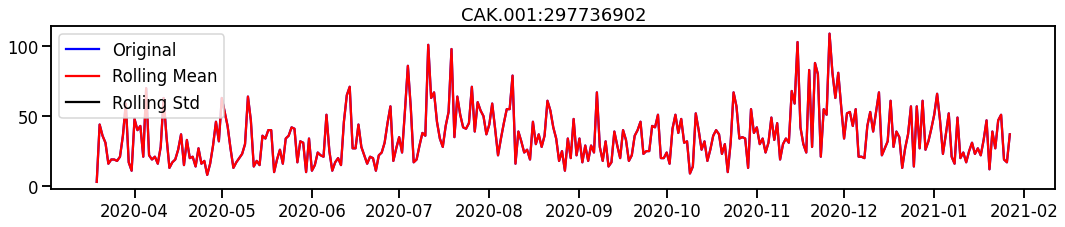

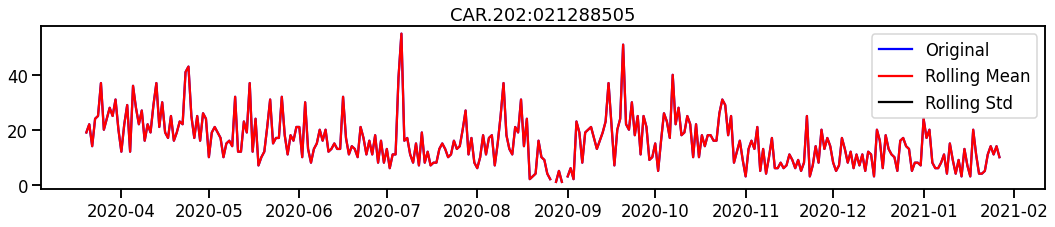

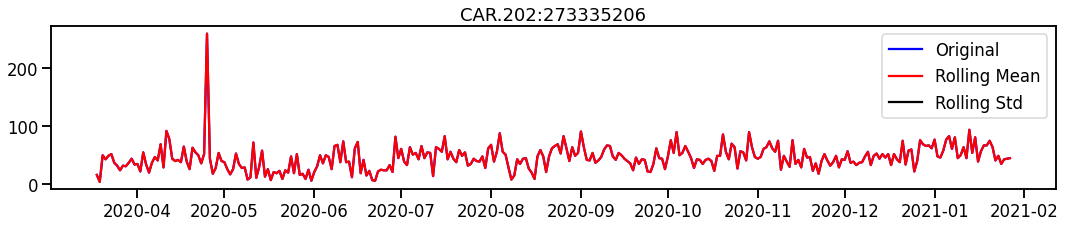

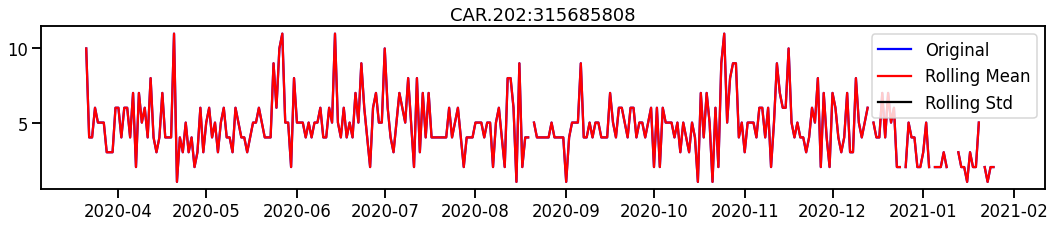

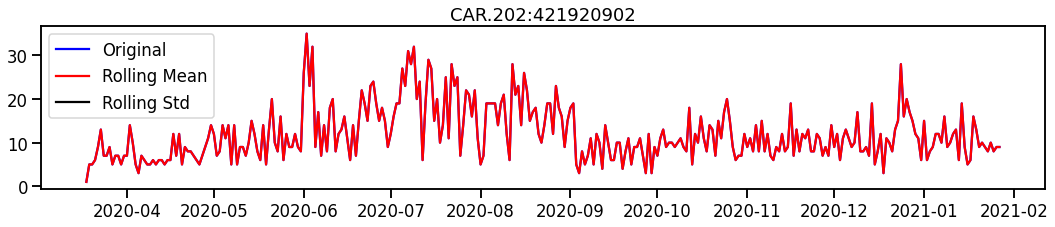

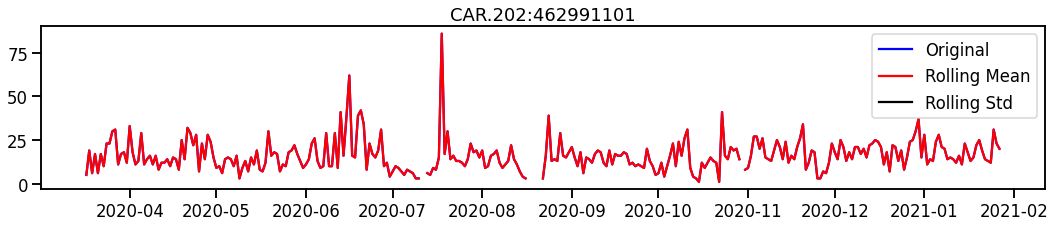

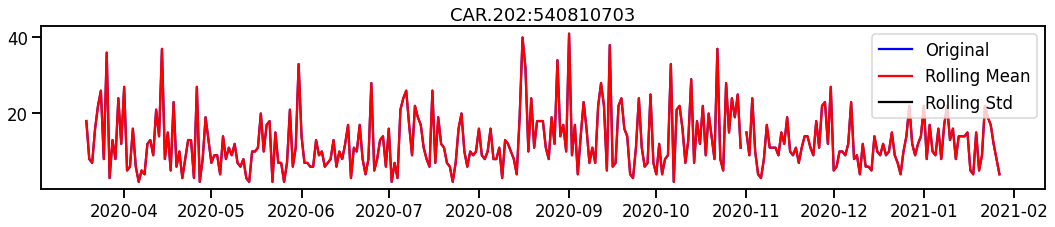

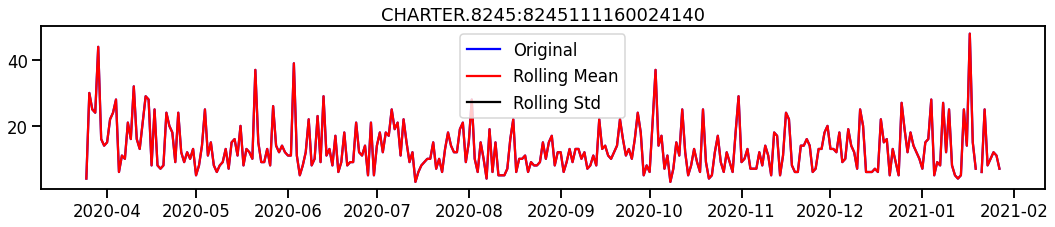

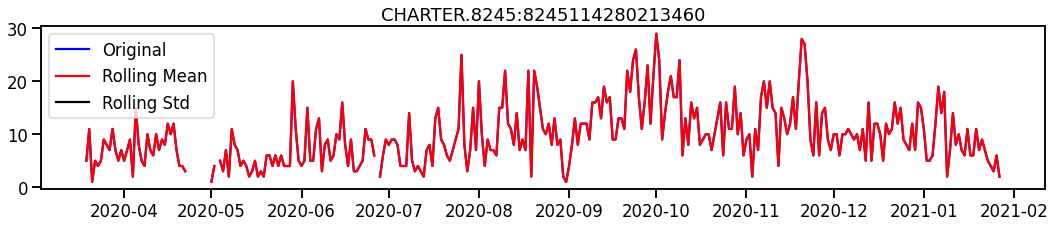

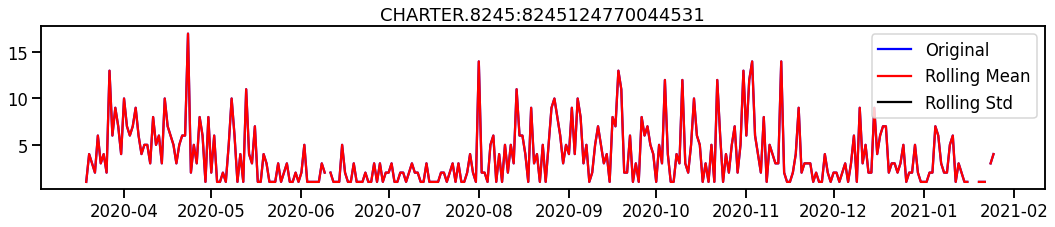

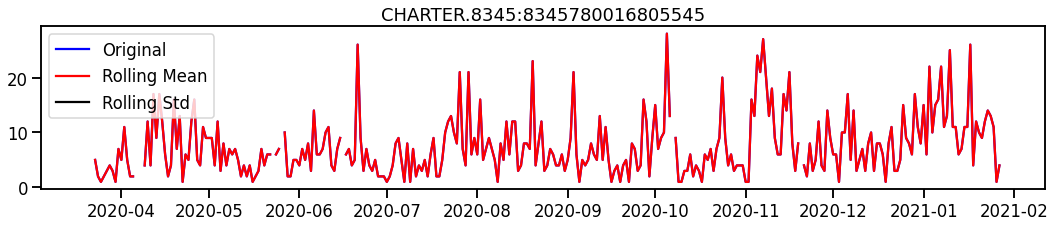

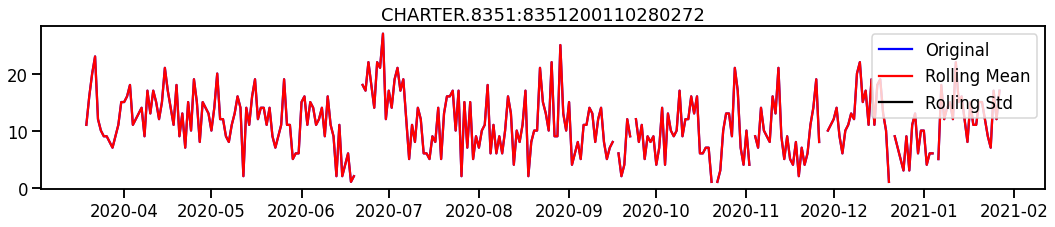

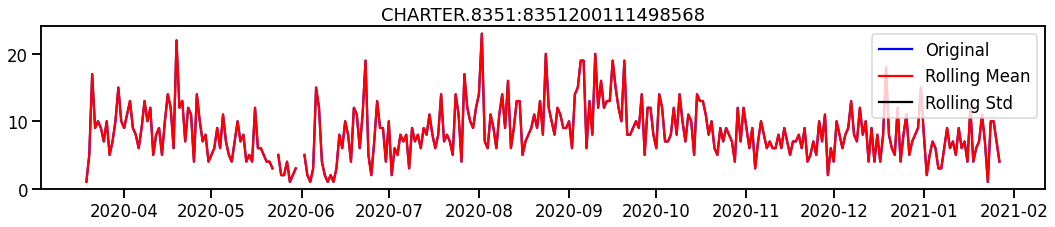

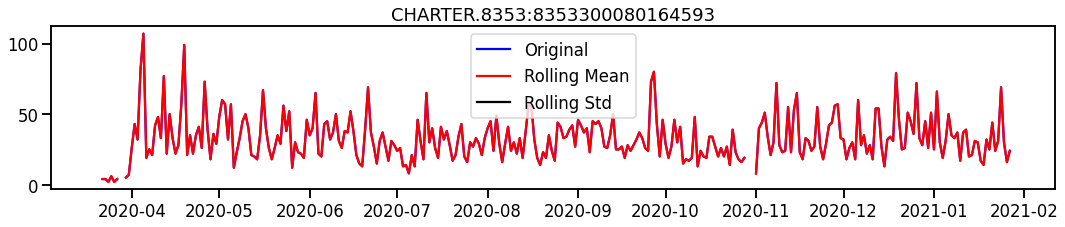

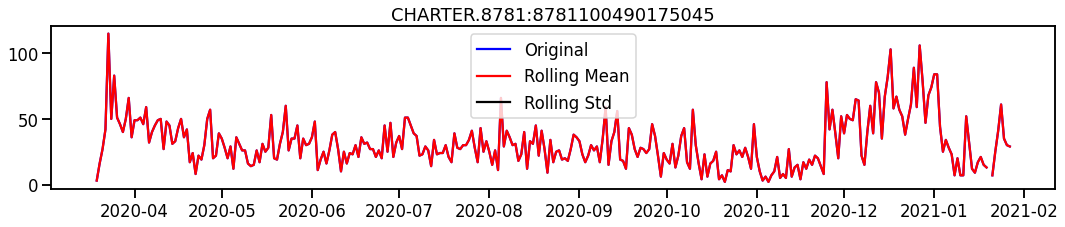

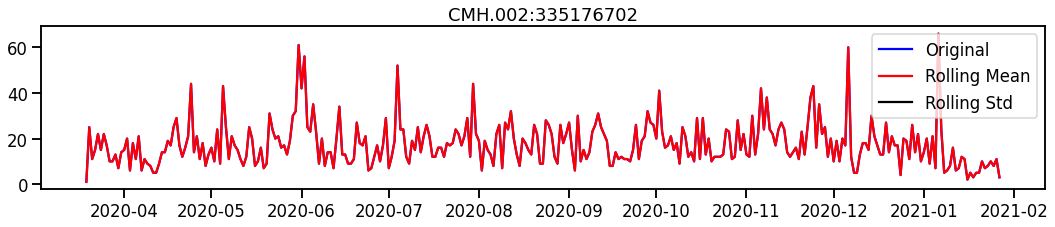

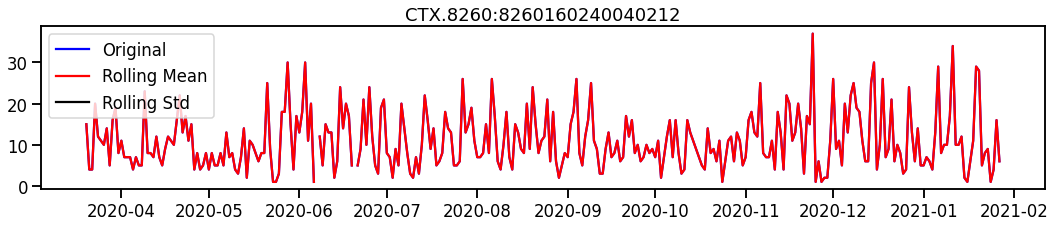

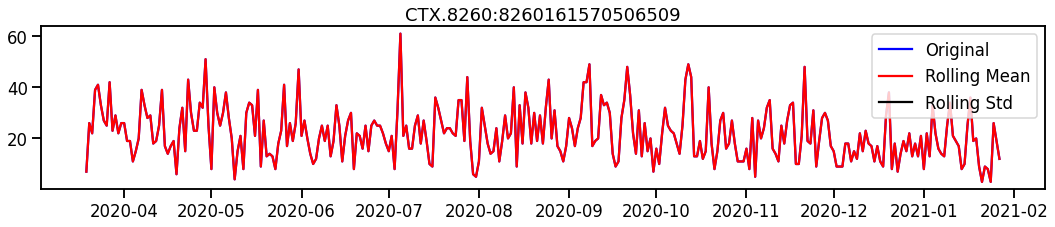

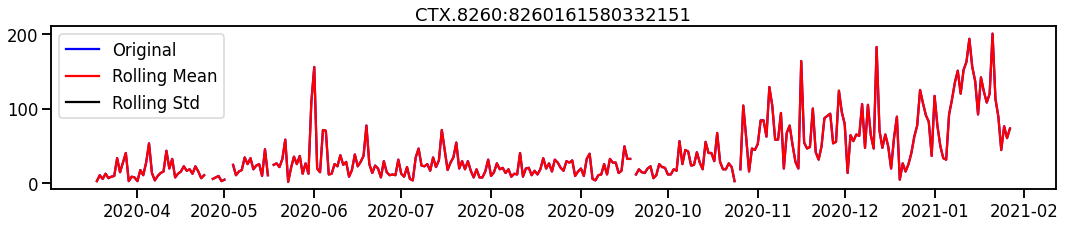

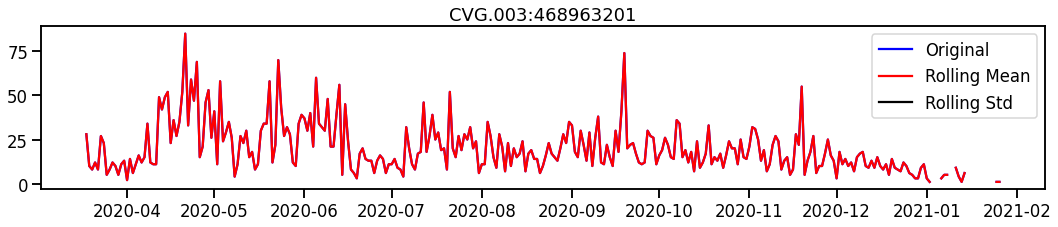

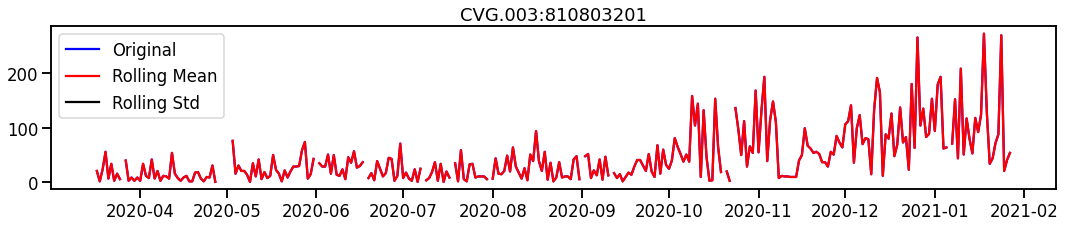

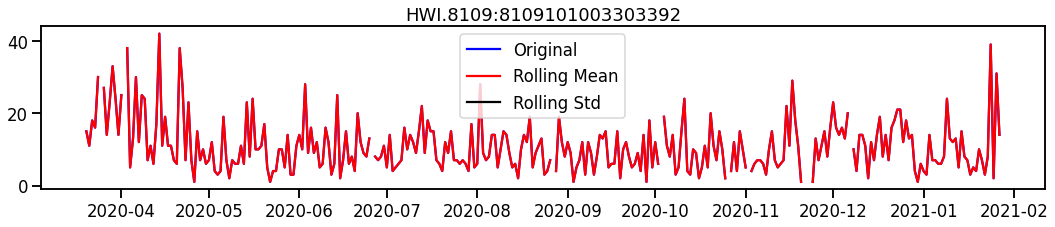

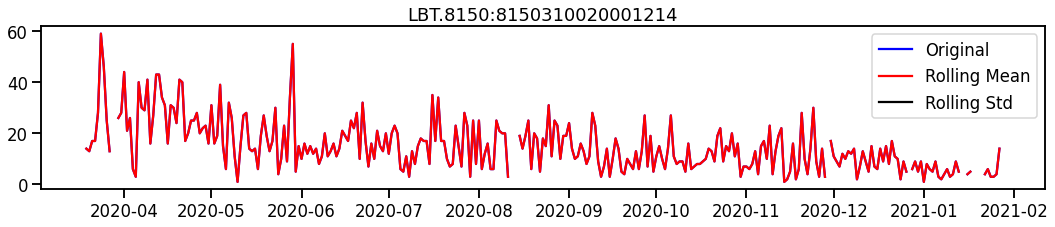

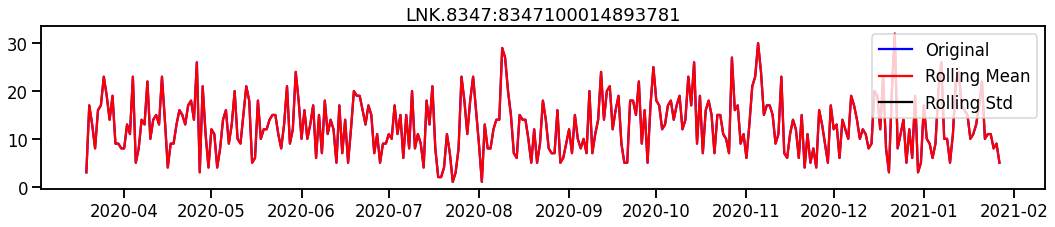

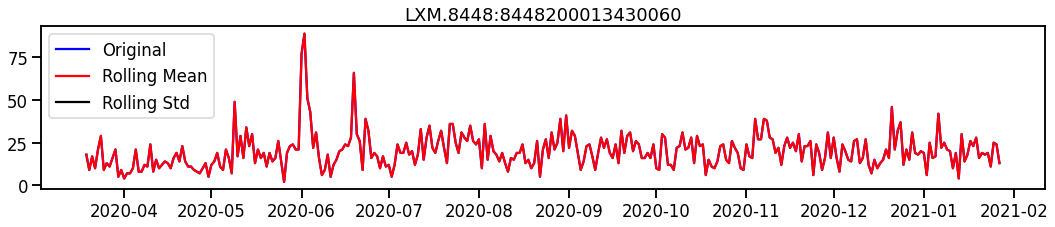

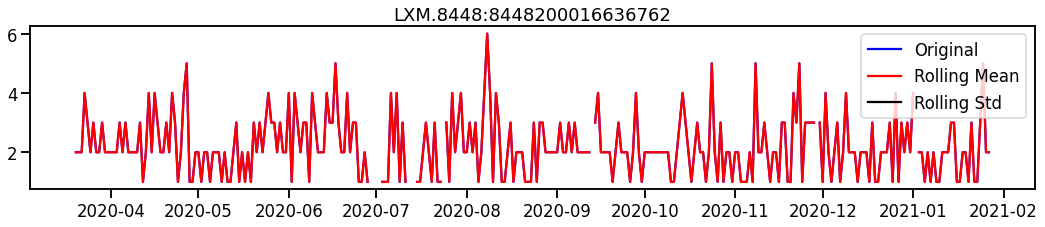

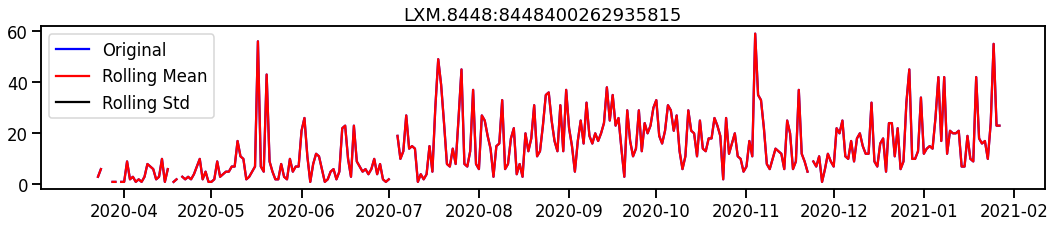

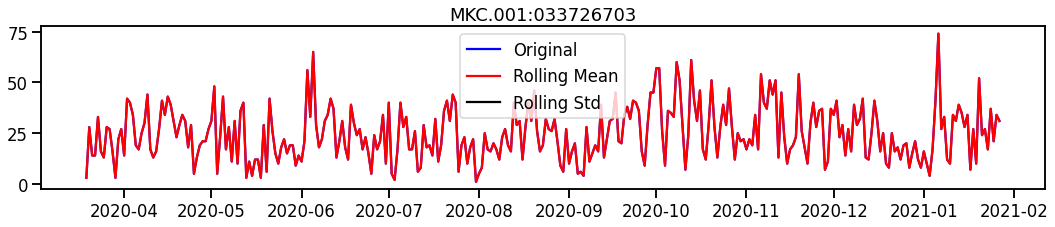

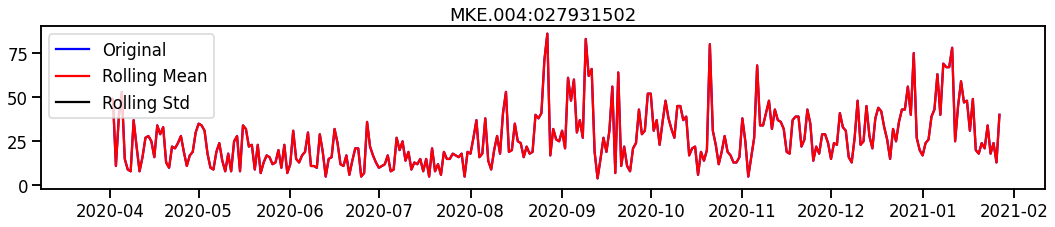

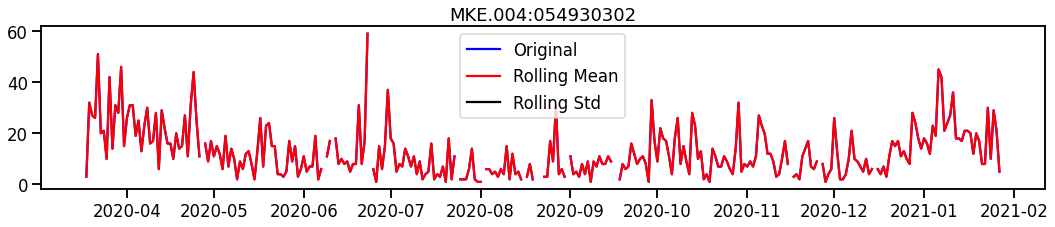

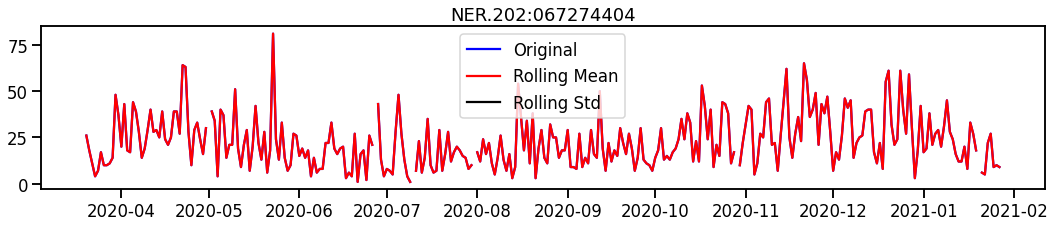

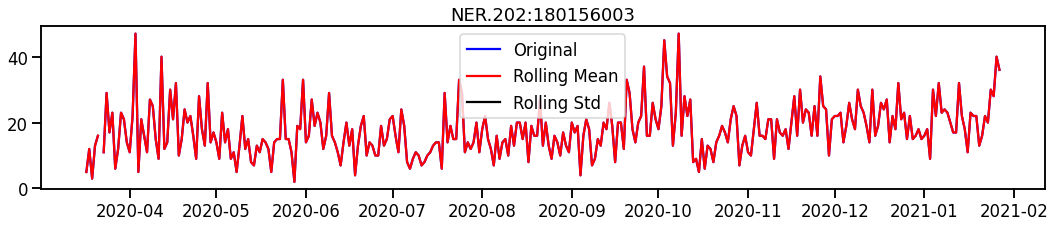

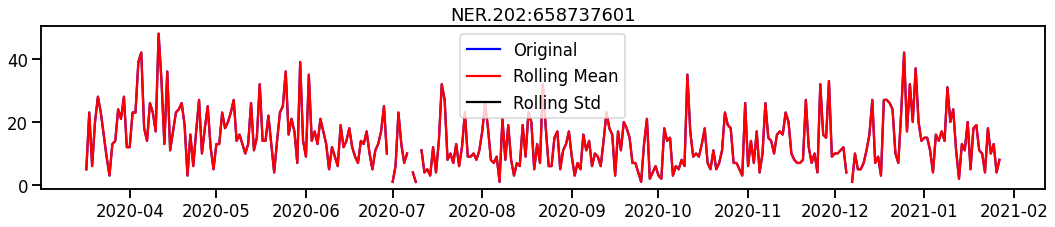

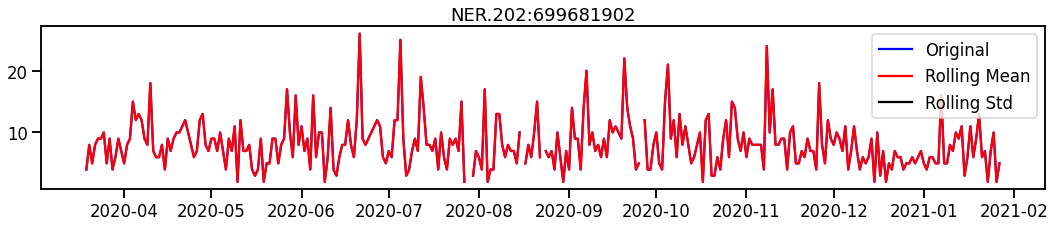

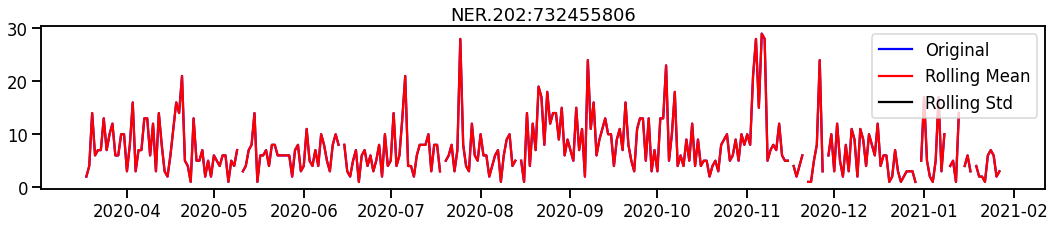

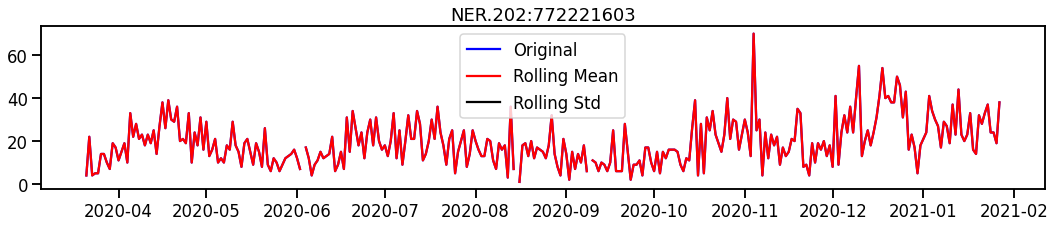

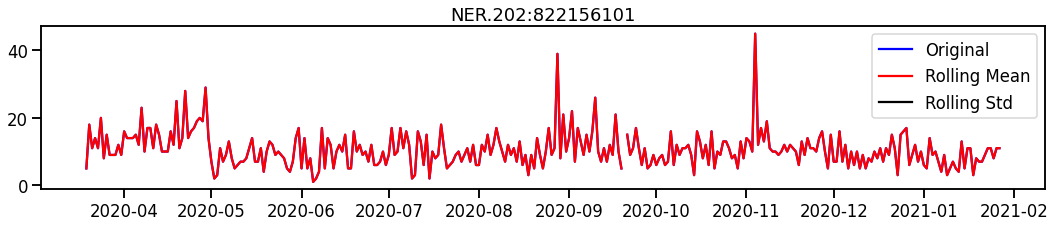

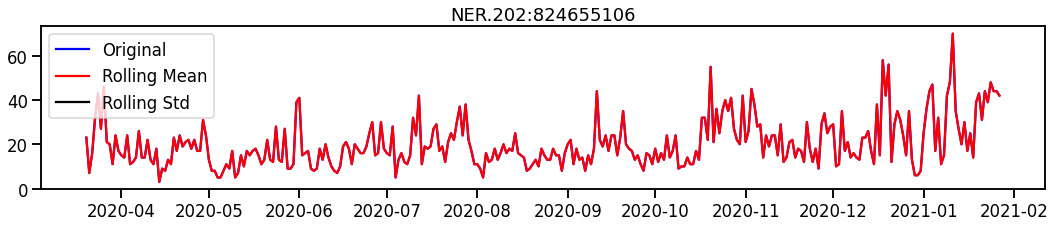

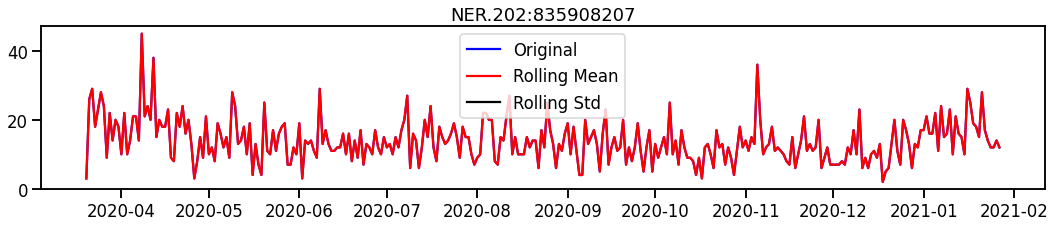

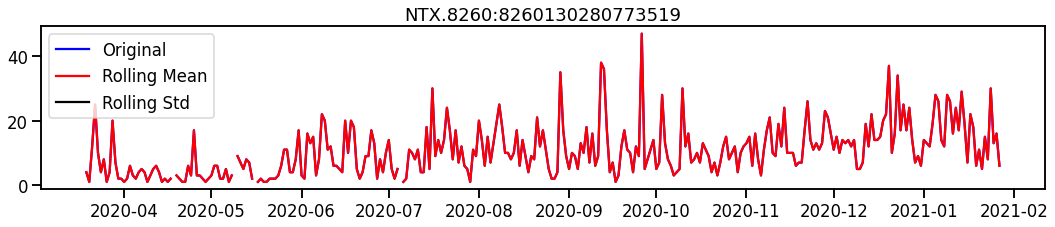

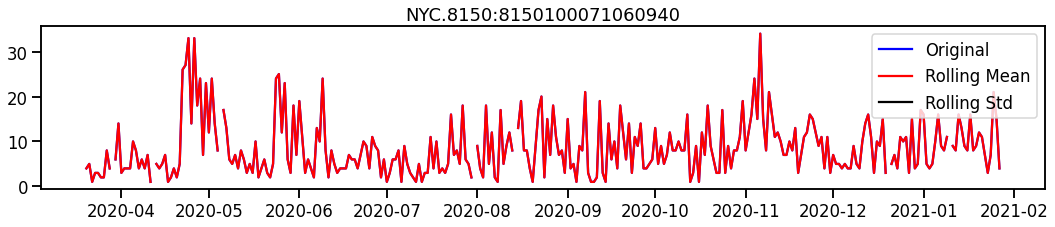

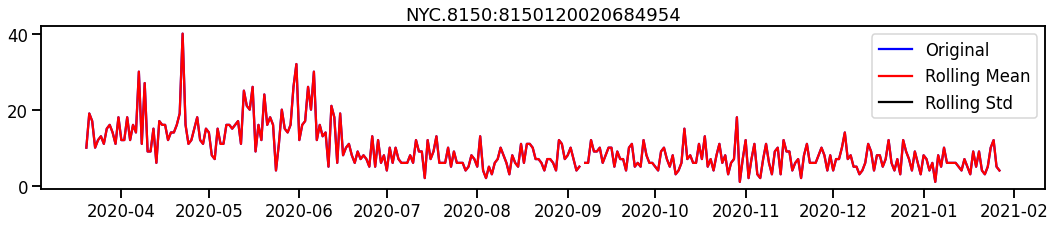

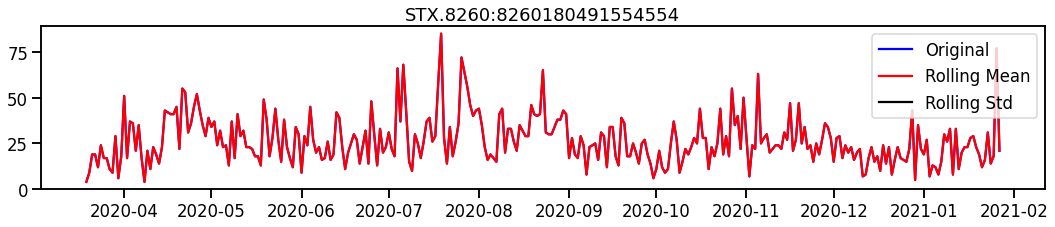

In [49]:
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(res[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

### Step 4: Pre-processing and Feature Engineering

In [53]:
# Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
# Extract the names of the numerical columns
names=res.columns
x = res[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

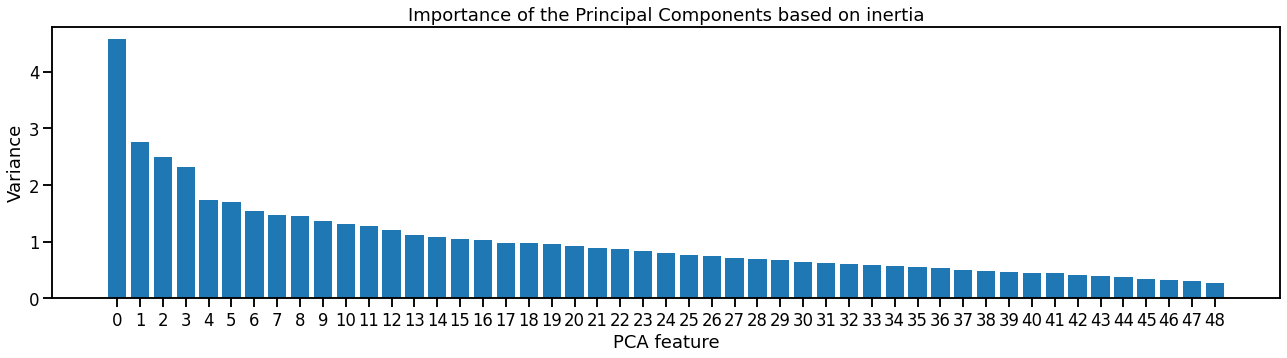

In [54]:
features = range(pca.n_components_)
_ = plt.figure(figsize=(22, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()

In [55]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [56]:
res['pc1']=pd.Series(principalDf['pc1'].values, index=res.index)
res['pc2']=pd.Series(principalDf['pc2'].values, index=res.index)

In [57]:
res.head()

sessionuserid  BHN.003:109608405  BHN.003:176727411  BHN.003:495850702  \
date                                                                     
2020-03-17              6.409677           5.104575          18.584665   
2020-03-18              4.000000           5.104575          18.584665   
2020-03-19              6.409677           5.104575          10.000000   
2020-03-20              1.000000           6.000000          31.000000   
2020-03-21              6.000000           7.000000          54.000000   

sessionuserid  BHN.003:514411902  CAK.001:274282101  CAK.001:283173304  \
date                                                                     
2020-03-17             29.109272          33.090323           3.537954   
2020-03-18             29.109272           2.000000           1.000000   
2020-03-19             29.109272          41.000000           3.000000   
2020-03-20             30.000000         173.000000           2.000000   
2020-03-21             29.109272         119.000000           4.000000   

sessionuserid  CAK.001:297736902  CAR.202:021288505  CAR.202:273335206  \
date                                                                     
2020-03-17             35.384127          15.759615          44.556962   
2020-03-18             35.384127          15.759615          15.000000   
2020-03-19              3.000000          15.759615           3.000000   
2020-03-20             44.000000          19.000000          49.000000   
2020-03-21             36.000000          22.000000          42.000000   

sessionuserid  CAR.202:315685808  ...  NER.202:772221603  NER.202:822156101  \
date                              ...                                         
2020-03-17              4.726974  ...          19.348387          10.617834   
2020-03-18              4.726974  ...          19.348387          10.617834   
2020-03-19              4.726974  ...          19.348387           5.000000   
2020-03-20              4.726974  ...          19.348387          18.000000   
2020-03-21             10.000000  ...           4.000000          11.000000   

sessionuserid  NER.202:824655106  NER.202:835908207  \
date                                                  
2020-03-17             20.273885          13.910828   
2020-03-18             20.273885          13.910828   
2020-03-19             20.273885          13.910828   
2020-03-20             23.000000           3.000000   
2020-03-21              7.000000          26.000000   

sessionuserid  NTX.8260:8260130280773519  NYC.8150:8150100071060940  \
date                                                                  
2020-03-17                     10.649518                   8.592834   
2020-03-18                     10.649518                   8.592834   
2020-03-19                      4.000000                   8.592834   
2020-03-20                      1.000000                   4.000000   
2020-03-21                     12.000000                   5.000000   

sessionuserid  NYC.8150:8150120020684954  STX.8260:8260180491554554  \
date                                                                  
2020-03-17                      9.501597                  26.660317   
2020-03-18                      9.501597                  26.660317   
2020-03-19                      9.501597                   4.000000   
2020-03-20                     10.000000                   9.000000   
2020-03-21                     19.000000                  19.000000   

sessionuserid        pc1         pc2  
date                                  
2020-03-17    -17.948003  -12.219525  
2020-03-18    -36.817033  -49.163002  
2020-03-19    -36.595203   -8.348665  
2020-03-20    -72.242689  104.357995  
2020-03-21    -83.200174   44.359123  

[5 rows x 51 columns]

#### Check stationarity with Dickey-Fuller Test


In [80]:
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1])

0.8500834337787453


In [82]:
for i in res.columns:
    result = adfuller(res[i])
    # Print p-value
    print(result[1])

0.009254404630306532
0.18511649028194183
6.508634581512246e-29
0.1983052928692025
0.1076143061085239
1.5849272968907239e-25
0.07488926665013163
0.00023273526338154718
8.18644801704308e-06
0.0033588133009136473
0.26430039112718784
1.6260682104736434e-16
4.6818744488530695e-30
3.4259427425286434e-05
0.06775932343661606
0.002893172791003007
1.3781284036037767e-09
5.610165256896024e-12
0.08709904066904117
6.807062743357271e-05
0.00013591520185933918
7.908135591748011e-15
0.0027753003321511873
0.040431655363595616
0.01663032208002617
0.05076138195733924
0.7189618249673324
1.7814338494319035e-10
0.0789444604859556
6.092963162734613e-27
7.194291743391231e-09
8.014977100873124e-30
0.44829006659799475
5.857447357044731e-05
5.457702630811428e-05
0.053574722484496476
0.23753740782025756
0.008182808063498179
0.030894008658821588
9.335671671188079e-29
7.862392986692122e-16
0.14506089336105582
1.6568012037699677e-09
0.015562933380841507
2.1927829707156446e-16
0.2630496886696053
6.480750726555267e-13

#####  If the value is 0,9622 then: “There is 96.22% that my process is non stationary”. Therefore, you cannot reject  H0  at, say, 5% and therefore you should conclude that the process is non stationary.
In the most intuitive sense, stationarity means that the statistical properties of a process generating a time series do not change over time.

Stationarity has to be reached before working on the dataset.
https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322


In [59]:
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1])

0.18061683199289796


##### p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. (The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.)

#### Checking autocorrelation

In [60]:
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.003119864019816245


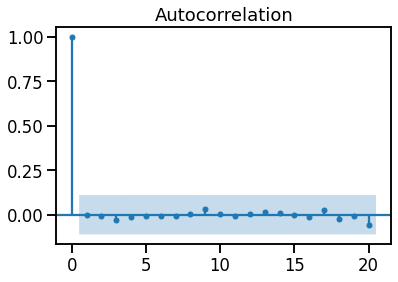

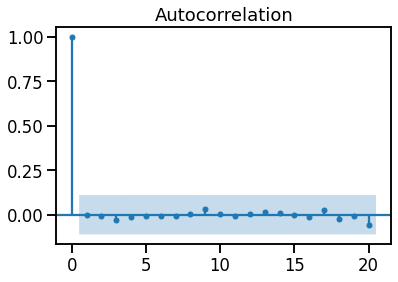

In [62]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [63]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  0.007184882536594085


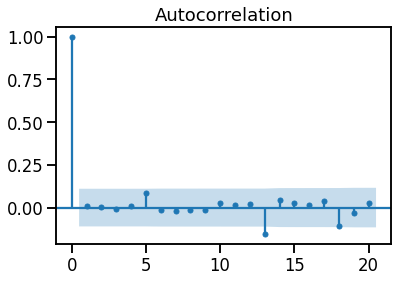

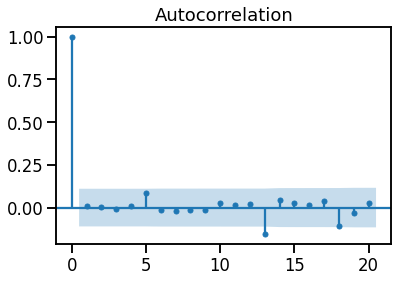

In [64]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

### Step 5: Modelling
#### Model 1: Isolation forest

###### Isolation forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies, instead of the most common techniques of profiling normal points.

In [65]:
# Import IsolationForest
from sklearn.ensemble import IsolationForest
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.05
model =  IsolationForest(contamination=outliers_fraction)
model.fit(principalDf.values) 
principalDf['anomaly2'] = pd.Series(model.predict(principalDf.values))

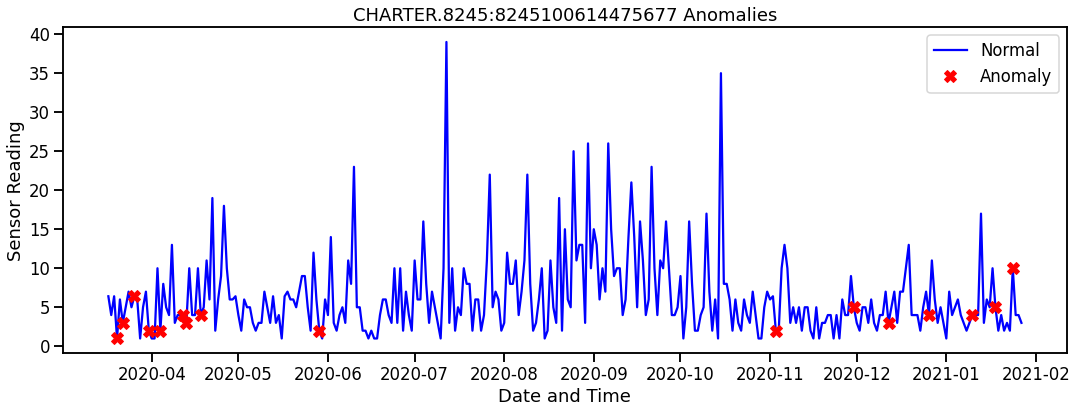

In [67]:
# visualization
res['anomaly2'] = pd.Series(principalDf['anomaly2'].values, index=res.index)
a = res.loc[res['anomaly2'] == -1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(res['BHN.003:109608405'], color='blue', label='Normal')
_ = plt.plot(a['BHN.003:109608405'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('CHARTER.8245:8245100614475677 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [68]:
res['anomaly2'].value_counts()

 1    301
-1     16
Name: anomaly2, dtype: int64

#### Model 2: K-means clustering

In [69]:
# Import necessary libraries
from sklearn.cluster import KMeans
# I will start k-means clustering with k=2 as I already know that there are 3 classes of "NORMAL" vs 
# "NOT NORMAL" which are combination of BROKEN" and"RECOVERING"
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

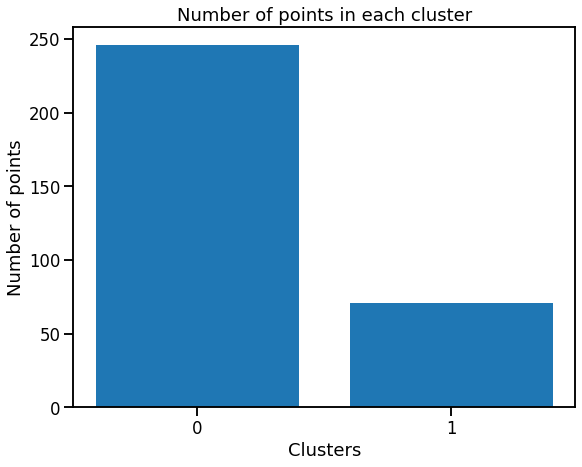

In [70]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

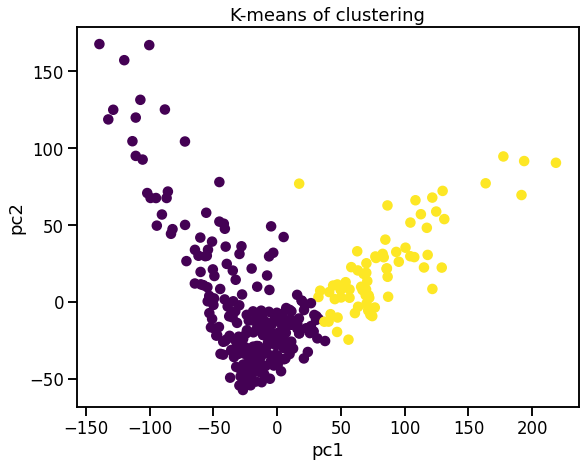

In [71]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

In [72]:
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [73]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.05
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

In [74]:
principalDf.head()

pc1         pc2  anomaly2  anomaly1
0 -17.948003  -12.219525         1         0
1 -36.817033  -49.163002         1         0
2 -36.595203   -8.348665         1         0
3 -72.242689  104.357995        -1         0
4 -83.200174   44.359123         1         0

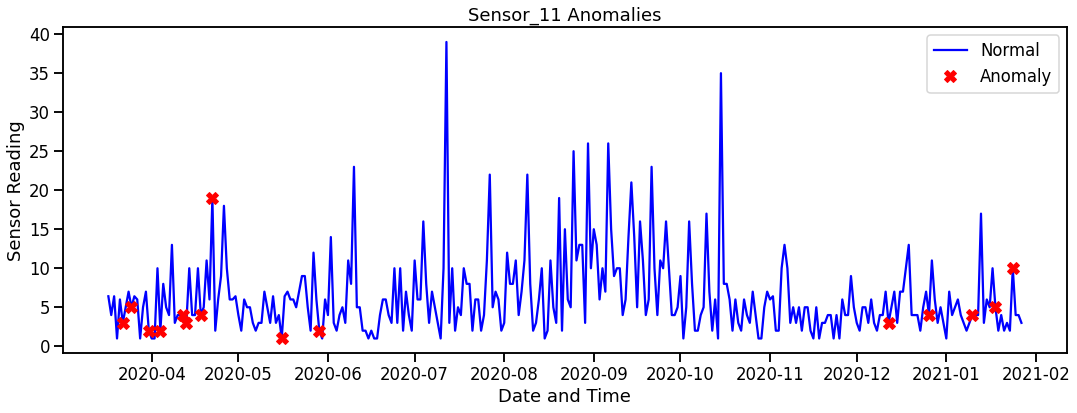

In [76]:
res['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=res.index)
a = res[res['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(res['BHN.003:109608405'], color='blue', label='Normal')
_ = plt.plot(a['BHN.003:109608405'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Sensor_11 Anomalies')
_ = plt.legend(loc='best')
plt.show();

In [77]:
principalDf['anomaly1'].value_counts()

0    302
1     15
Name: anomaly1, dtype: int64